### Autoren:
Mat. Nr.: 2888214, zuständig für Aufg. 2, 3, 5 <br>
Mat. Nr.: 3626401, zuständig für Aufg. 1, 4, 6

## Aufg. 1: Business Understanding

### Zielsetzung
Das Ziel dieses Projekts ist es, fünf potenzielle Städte für einen sechsmonatigen Aufenthalt als Remote Worker in der Kreativbranche zu identifizieren. Der Fokus liegt dabei auf tropisch warmen Ländern, da diese nicht nur ein angenehmes Klima bieten, sondern auch einzigartige wirtschaftliche und infrastrukturelle Eigenschaften aufweisen.

### Ausgangssituation und Fragestellungen
Wir arbeiten mit dem globalen „Cost of Living“-Datensatz von Kaggle, der uns detaillierte Informationen über Lebenshaltungskosten in Städten weltweit liefert. Anhand dieses Datensatzes wollen wir untersuchen, wie sich Lebenshaltungskosten und Infrastruktur in tropisch warmen Ländern im Vergleich zu Regionen wie Europa und Nordamerika darstellen. Unsere beiden Personen ernähren sich gerne Gesund, und legen daher auch viel Wert auf die Preise von Früchten & Obst und lokalen Essen. Sie betreiben ebenfalls viel Sport und haben kein Auto, weshalb Kosten für Freizeitaktivitäten und Öffentliche Verkersmittel großen Einfluss haben.

### Zentrale Hypothesen
1. **Tropisch Warme Länder sind meist Touristen Hotspots:**  
   Diese Hypothese basiert auf der Annahme, dass der touristische Reiz tropischer Länder zu spezifischen Preisstrukturen führt. Saisonale Schwankungen und hohe Nachfrage in bestimmten Sektoren (z.B. Unterkunft, Gastronomie) könnten die Lebenshaltungskosten in diesen Städten beeinflussen.

2. **Tropische warme Länder haben tendenziell niedrigere Kosten als Europa und Nordamerika:**  
   Aufgrund unterschiedlicher wirtschaftlicher Rahmenbedingungen und oft geringerer Durchschnittseinkommen gehen wir davon aus, dass die allgemeinen Lebenshaltungskosten in tropisch warmen Ländern unter denen in entwickelten Regionen liegen.

3. **Eine gute Infrastruktur korreliert mit höheren Kosten:**  
   Es wird vermutet, dass Städte mit moderner Infrastruktur, etwa in Bereichen wie Internet und öffentlichem Verkehr, höhere Lebenshaltungskosten aufweisen. Diese Investitionen in Infrastruktur könnten sowohl den Komfort als auch das Preisniveau in die Höhe treiben.
4. **Höhere lokale Gehälter gehen mit höheren Wohnkosten einher:**  
   Wir nehmen an, dass höhere lokale Gehälter eine korrelation mit hohen wohnkosten haben. Dies würd sinn machen, da die Bewohner in diesen Gegenden Wolhabender sind und mehr Zahlen können.
5. **Transportkosten ähnlich zu lokalen Einkommen**  
   Länder in welchen das Einkommen niedriger ist, haben haben günstigere Öffentliche Verkehrsmittel.
6. **Freizeitkosten als Indikator für den urbanen Lebensstandard**  
   Freizeitkosten vergleichen mit Miete, Gehalt etc.

### Weiteres Vorgehen
Auf Basis dieser Hypothesen werden wir in der Datenexploration und -analyse prüfen, inwiefern diese Zusammenhänge bestehen. Die gewonnenen Erkenntnisse sollen als Entscheidungsgrundlage dienen, um letztlich fünf Städte auszuwählen, die sowohl kosteneffizient als auch attraktiv hinsichtlich Klima, Infrastruktur und touristischem Potenzial sind.

## Aufg. 2: Data Preperation 
### Datenbereinigung und Zuordnung von Ländern zu Kontinenten

Zur Vorbereitung der Analyse wurden zunächst mehrere Schritte zur Datenbereinigung und -anreicherung durchgeführt:

1. **Einlesen und Filtern der Daten**  
   Der Datensatz `cost-of-living_v2.csv` enthält weltweite Informationen zu Lebenshaltungskosten. Zunächst wurden alle Einträge mit schlechter Datenqualität (`data_quality == 0`) entfernt, um Verzerrungen in der Analyse zu vermeiden. Anschließend wurde der DataFrame nach Ländern alphabetisch sortiert und die Indizes zurückgesetzt.

2. **Abruf aktueller Länderdaten mit Regionen (Kontinenten)**  
   Um die Daten regional auszuwerten, wurde eine API (`https://www.apicountries.com/countries`) verwendet, die Informationen über Länder und deren zugehörige Weltregionen bereitstellt. Die Antwort wurde in ein Dictionary (`country_to_continent`) überführt, in dem jedem Ländernamen der entsprechende Kontinent zugeordnet wurde. Dabei wurden auch alternative Schreibweisen berücksichtigt (z. B. "USA" für "United States of America").

3. **Fuzzy Matching zur Verbesserung der Länder-Zuordnung**  
   Da Ländernamen im Datensatz nicht immer exakt mit den offiziellen API-Bezeichnungen übereinstimmen (z. B. "South Korea" vs. "Korea, Republic of"), wurde ein mehrstufiges Matching-Verfahren eingesetzt:
   - Zunächst wird geprüft, ob der Ländername direkt im Mapping enthalten ist.
   - Falls nicht, wird das erste Wort des Ländernamens geprüft (z. B. "South").
   - Falls auch das keinen Treffer ergibt, wird ein Fuzzy-Matching-Algorithmus (über das `thefuzz`-Paket) verwendet, der auf Ähnlichkeiten zwischen Zeichenfolgen basiert. Nur Matches mit einer Ähnlichkeit über 80 % werden akzeptiert.

4. **Anreicherung des Datensatzes mit Kontinentinformationen**  
   Durch Anwendung der Funktion `find_best_match` auf die `country`-Spalte des ursprünglichen Datensatzes wurde jeder Stadt bzw. jedem Eintrag ein zugehöriger Kontinent zugeordnet. Diese Information bildet die Grundlage für weitere Auswertungen nach geografischen Regionen.

Diese Schritte stellen sicher, dass alle Länder konsistent klassifiziert sind und ermöglichen eine geografisch differenzierte Analyse der Lebenshaltungskosten weltweit.


In [55]:
import pandas as pd
import requests
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from thefuzz import process

def find_best_match(country):
    # Versuche zuerst ein direktes Mapping
    if country in country_to_continent:
        return country_to_continent[country]

    # Versuche es mit dem ersten Wort
    first_word = country.split()[0]
    if first_word in country_to_continent:
        return country_to_continent[first_word]

    # Falls kein direkter Treffer: Fuzzy Matching versuchen
    best_match, score = process.extractOne(country, country_to_continent.keys())
    if score > 80:  # 80 bedeutet "ziemlich sicher"
        return country_to_continent[best_match]

    # Falls nichts gefunden, None zurückgeben
    return None

# Entferne die Spalten mit schlechter Qualität
data = pd.read_csv("./data/cost-of-living_v2.csv")
data.drop(data[data['data_quality'] == 0].index, inplace=True)
data.sort_values(by=['country'], inplace=True)
data.reset_index(drop=True, inplace=True)


# Mappen der Länder zu Kontinenten
url = "https://www.apicountries.com/countries"
response = requests.get(url)
countries = response.json()

country_to_continent = {}
for item in countries:
    country_to_continent[item["name"]] = item["region"]

    if "altSpellings" in item:
        for alt_name in item["altSpellings"]:
            country_to_continent[alt_name] = item["region"]

data["continent"] = data["country"].apply(find_best_match)


## Aufg. 3: Data Exploration und Analyse
Untersuchen Sie den Datensatz in Bezug auf das Ziel nach den Regeln wie in der Vorlesung gelehrt. Nutzen Sie Markup, um wichtige Erkenntnisse zu dokumentieren.

Werten Sie sowohl Kontinente, Länder, Städte sinnvoll nach Ihren Zielen generell aus. Berücksichtigen Sie ihr Gruppenziel dabei spezifisch.

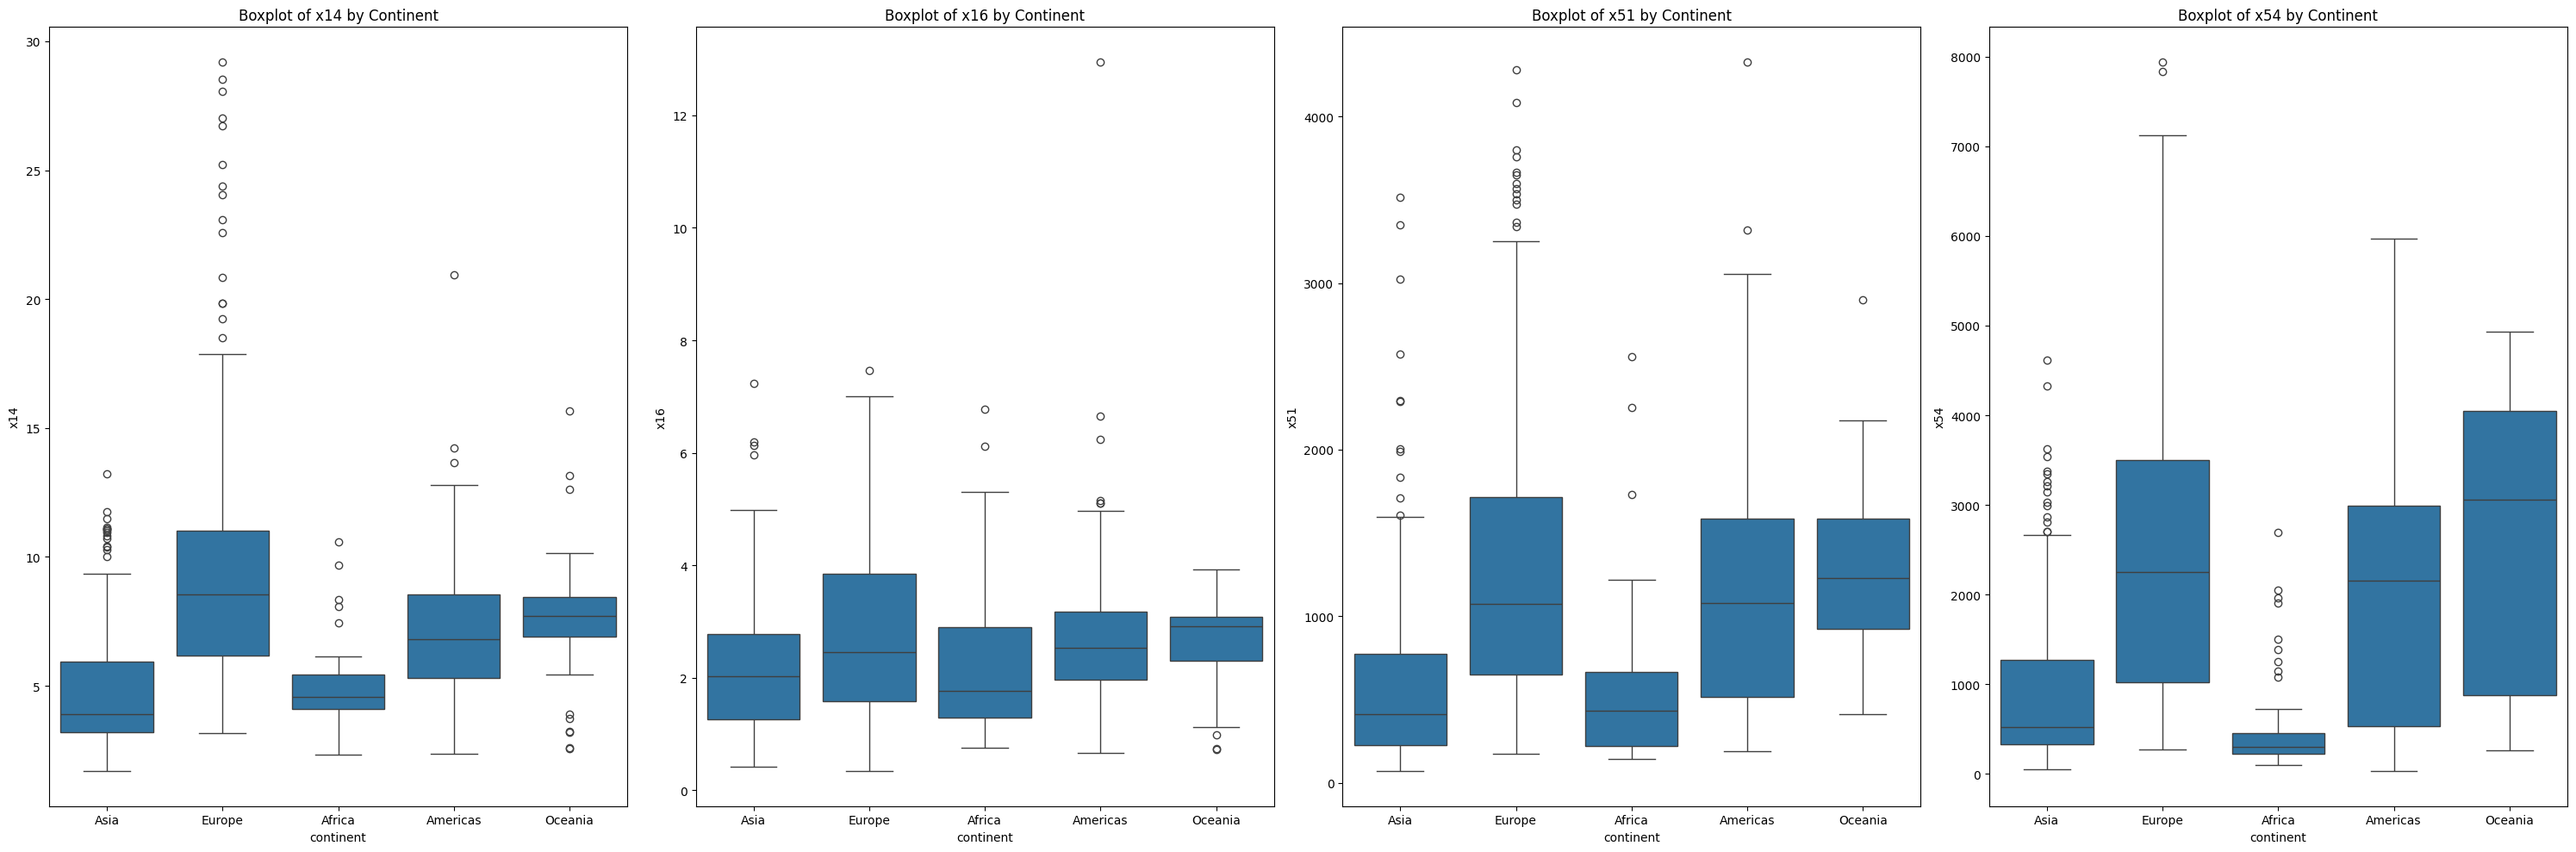

In [56]:
fig, axes = plt.subplots(1, 4, figsize=(30, 10))
numeric_columns = ['x14','x16', 'x51', 'x54']

for ax, column in zip(axes, numeric_columns):
    sns.boxplot(x='continent', y=column, data=data, ax=ax)
    ax.set_title(f"Boxplot of {column} by Continent")

plt.tight_layout()
plt.show()

### Analyse der Lebenshaltungskosten nach Kontinenten

Für die Auswahl geeigneter tropischer Städte wurden vier zentrale Variablen aus dem globalen "Cost of Living"-Datensatz betrachtet, welche für unser Szenario als Remote Worker mit Fokus auf gesunde Ernährung relevant sind.

---

#### x14 - Chicken Fillets (1kg)
- In Europa liegen die Preise für Hähnchenbrustfilet deutlich höher als in anderen Regionen.
- Tropische Regionen (v. a. Asien, Afrika, Teile der Amerikas) bieten hier wesentlich günstigere Preise.
- Gerade für eine proteinreiche und gesunde Ernährung ein positiver Faktor für tropische Länder.

---

#### x16 - Apples (1kg)
- Auch für Obst, exemplarisch dargestellt anhand von Äpfeln, zeigt sich ein ähnliches Bild.
- Europa weist die höchsten Preise auf.
- In Asien und Afrika ist der Median der Apfelpreise deutlich niedriger.
- Die tropischen Länder innerhalb dieser Regionen erlauben also eine kostengünstigere gesunde Ernährung.

---

#### x51 - Apartment (3 bedrooms) Outside of Centre
- Die Mieten in Europa und Nordamerika sind im Mittel höher als in Asien und Afrika.
- Oceania liegt zwischen den Kontinenten, zeigt jedoch auch eher höhere Kosten.
- Für tropische Regionen bedeutet das: Man erhält mehr Wohnraum für weniger Geld, was insbesondere für einen längeren Aufenthalt als Remote Worker vorteilhaft ist.

---

#### x54 - Average Monthly Net Salary (After Tax)
- Die höchsten Durchschnittsgehälter finden sich in Europa und Nordamerika.
- In tropischen Ländern (Asien, Afrika, Lateinamerika) sind die Durchschnittseinkommen geringer.
- Für unsere Situation als Remote Worker ist dies jedoch nicht nachteilig, da das Einkommen unabhängig vom lokalen Arbeitsmarkt bezogen wird.

---

### Fazit
Tropisch warme Regionen bieten im Vergleich zu Europa und Nordamerika:
- Günstigere Preise für Lebensmittel (insbesondere Obst und Fleisch).
- Niedrigere Wohnkosten.
- Für Remote Work sind diese Regionen besonders attraktiv, da die geringeren Lebenshaltungskosten direkt den Lebensstandard erhöhen, ohne dass das eigene Einkommen reduziert wird.


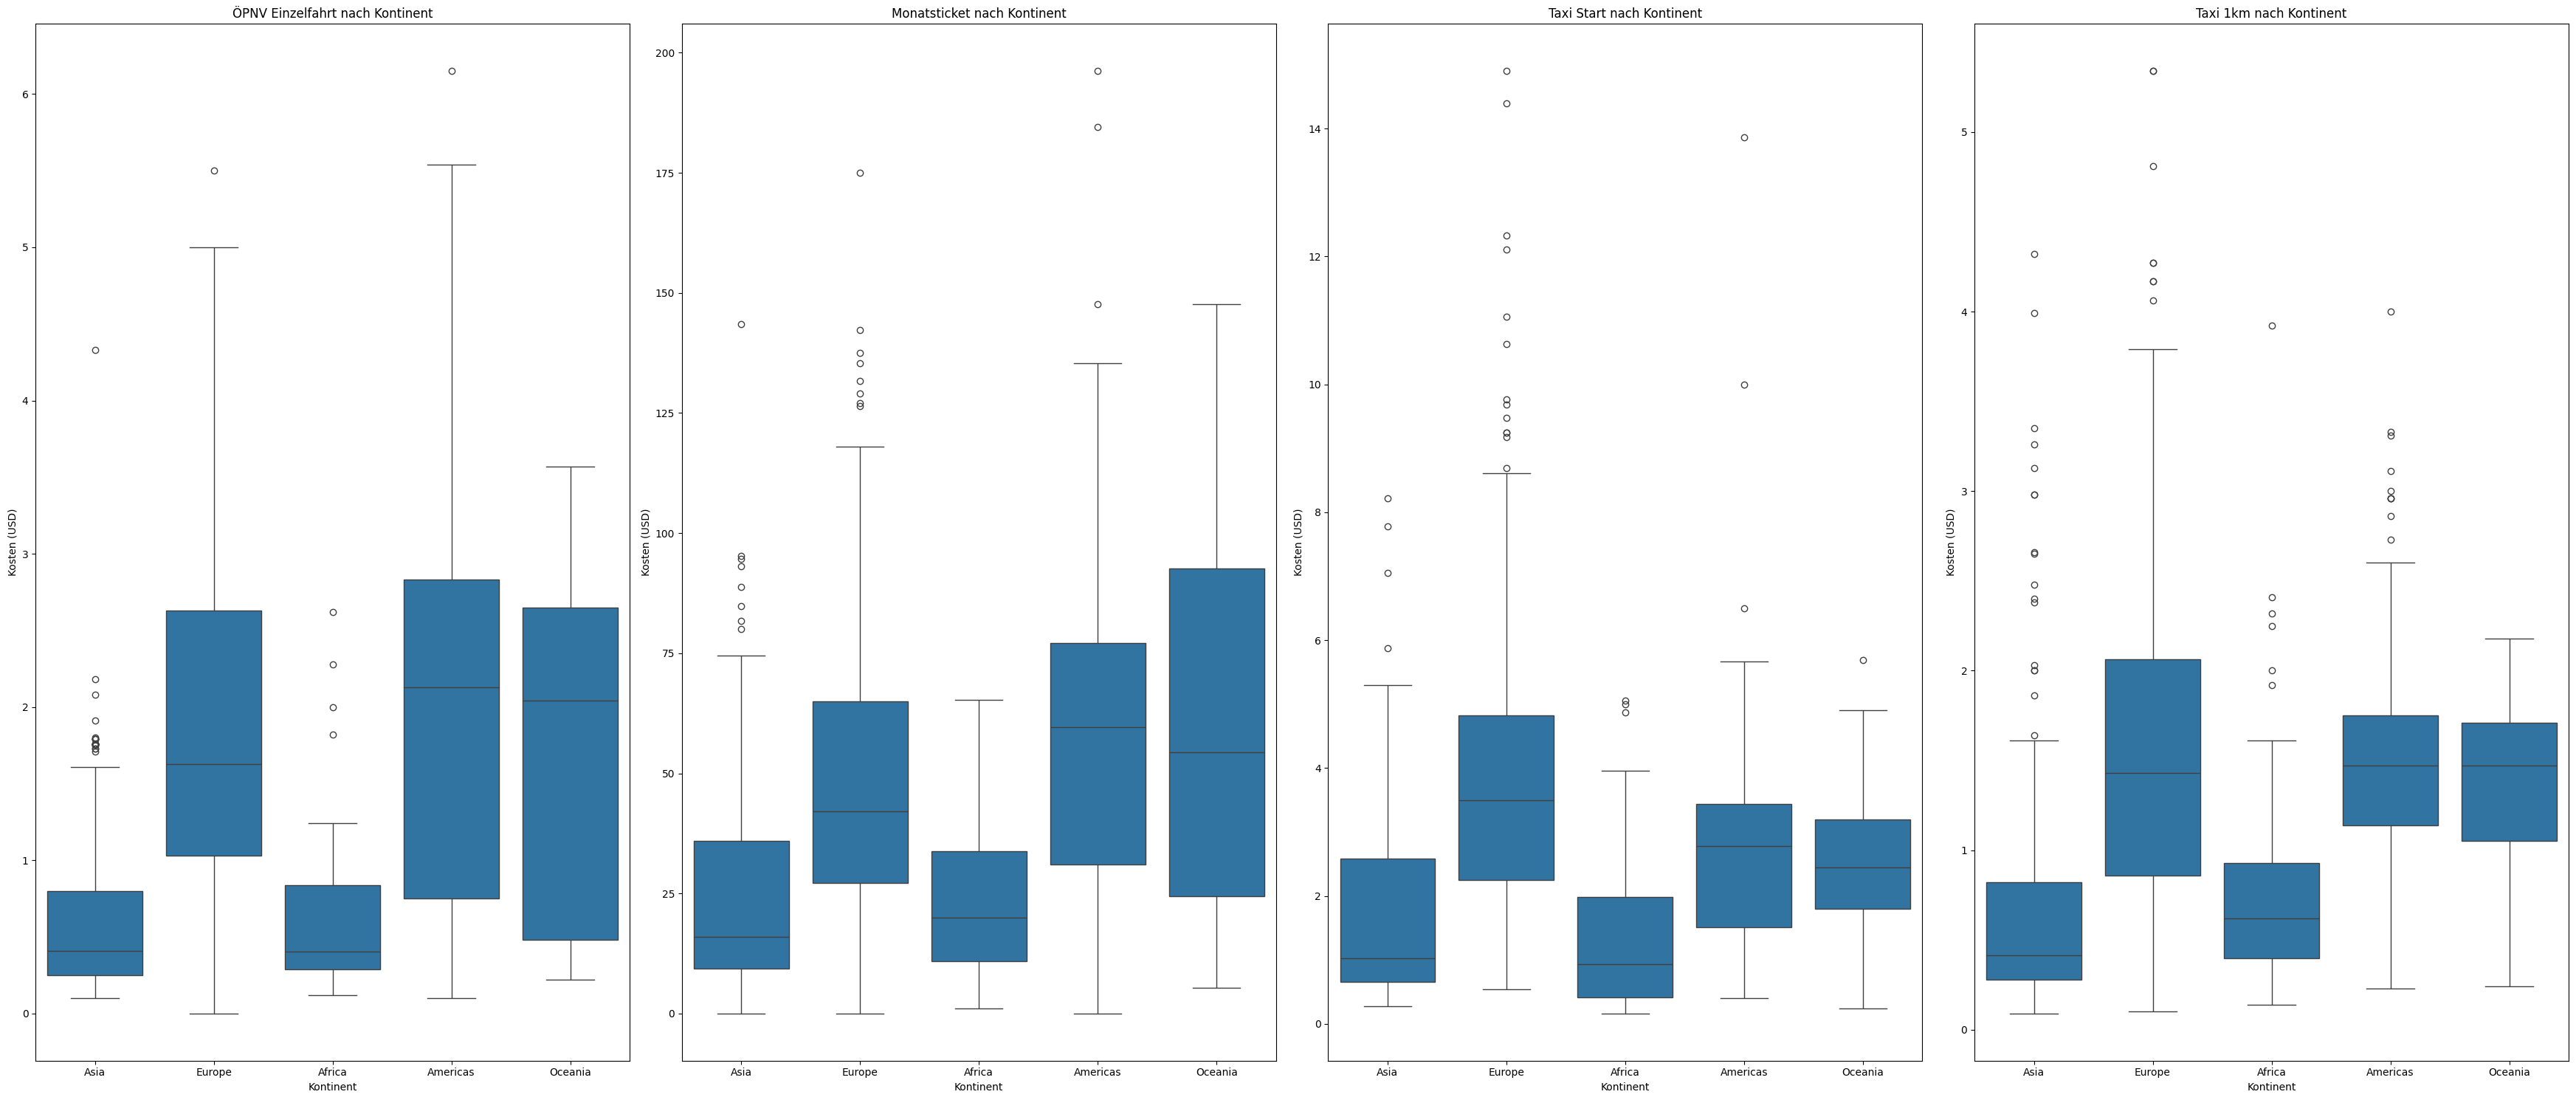

In [57]:
transport_columns = ['x28',
                     'x29',
                     'x30',
                     'x31'
]

column_names = {
    'x28': 'ÖPNV Einzelfahrt',
    'x29': 'Monatsticket',
    'x30': 'Taxi Start',
    'x31': 'Taxi 1km',
    'x39': 'Fitnessstudio (monatlich)',
    'x40': 'Tennisplatz (1h, Wochenende)',
    'x41': 'Kino (1 Ticket)'
}

fig, axes = plt.subplots(1, 4, figsize=(35, 15))
transport_columns = ['x28', 'x29', 'x30', 'x31']

for ax, column in zip(axes, transport_columns):
    sns.boxplot(x='continent', y=column, data=data, ax=ax)
    ax.set_title(f"{column_names[column]} nach Kontinent")
    ax.set_xlabel("Kontinent")
    ax.set_ylabel("Kosten (USD)")

plt.tight_layout()
plt.show()


### Analyse der Mobilitätskosten nach Kontinent

Die erste Abbildung zeigt einen Vergleich der Kosten für unterschiedliche Mobilitätsformen (ÖPNV-Einzelfahrt, Monatsticket, Taxistart, Taxi pro Kilometer) in den verschiedenen Kontinenten. Insgesamt lässt sich feststellen, dass Asien und Afrika im Median die niedrigsten Mobilitätskosten aufweisen. Besonders auffällig ist dies bei Monatstickets, bei denen die monatlichen Ausgaben in Europa, den Amerikas und Ozeanien deutlich über denen in Asien oder Afrika liegen. Ähnlich verhält es sich bei den Kosten für Taxifahrten: Während Europa sowohl beim Starttarif als auch bei den Kosten pro Kilometer tendenziell teurer ist, bewegen sich die Werte in Afrika und Asien auf einem vergleichsweise niedrigen Niveau.

Diese Erkenntnisse sind besonders relevant für Remote Worker, die vor Ort auf öffentliche Verkehrsmittel oder günstige Taxialternativen angewiesen sind. Städte in Asien und Afrika könnten somit – allein aus verkehrskostenbezogener Sicht – ökonomisch attraktive Optionen für längere Aufenthalte darstellen.


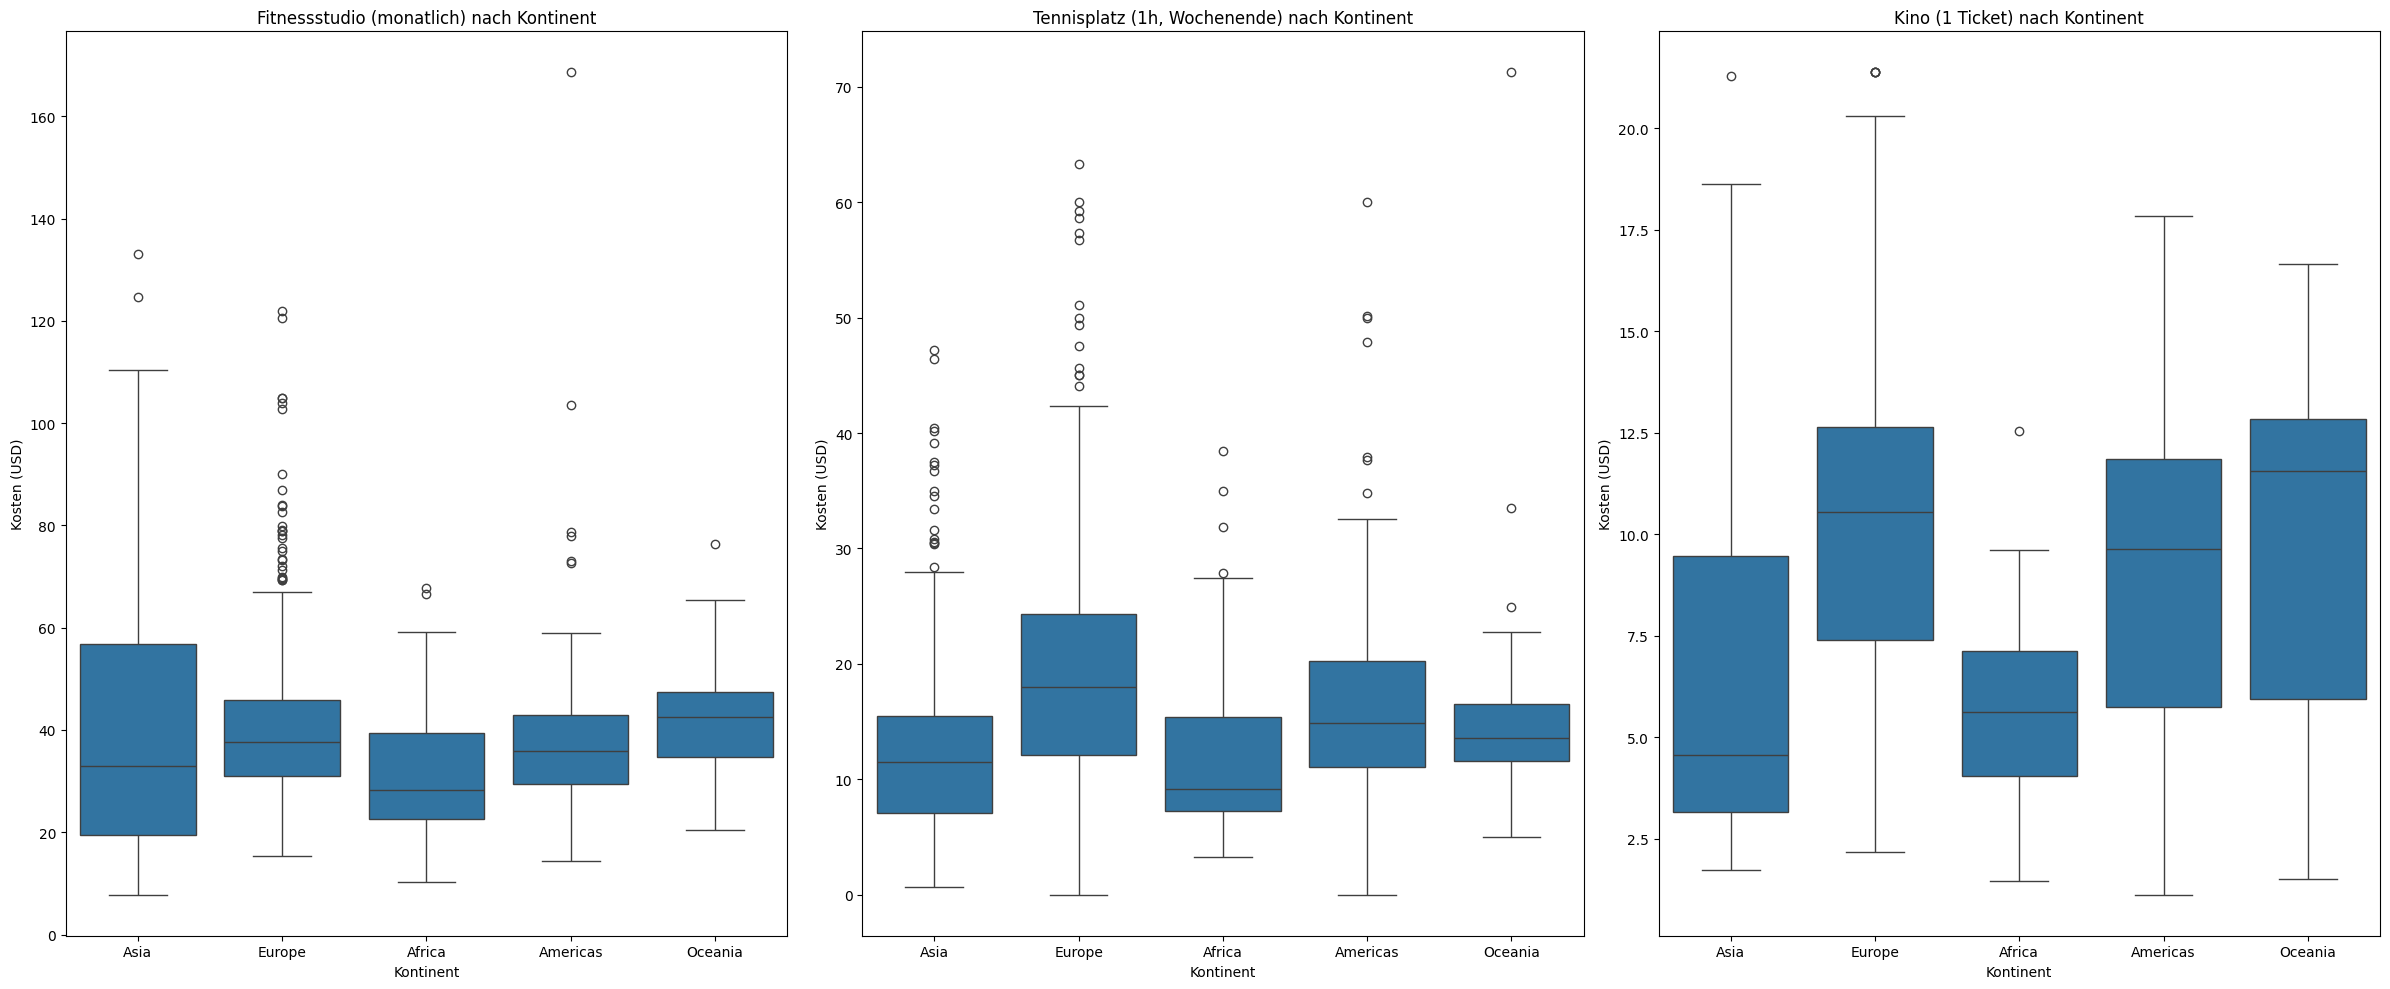

In [58]:
freizeit_columns = ['x39',
                    'x40',
                    'x41']

fig, axes = plt.subplots(1, 3, figsize=(24, 10))
freizeit_columns = ['x39', 'x40', 'x41']

for ax, column in zip(axes, freizeit_columns):
    sns.boxplot(x='continent', y=column, data=data, ax=ax)
    ax.set_title(f"{column_names[column]} nach Kontinent")
    ax.set_xlabel("Kontinent")
    ax.set_ylabel("Kosten (USD)")

plt.tight_layout()
plt.show()


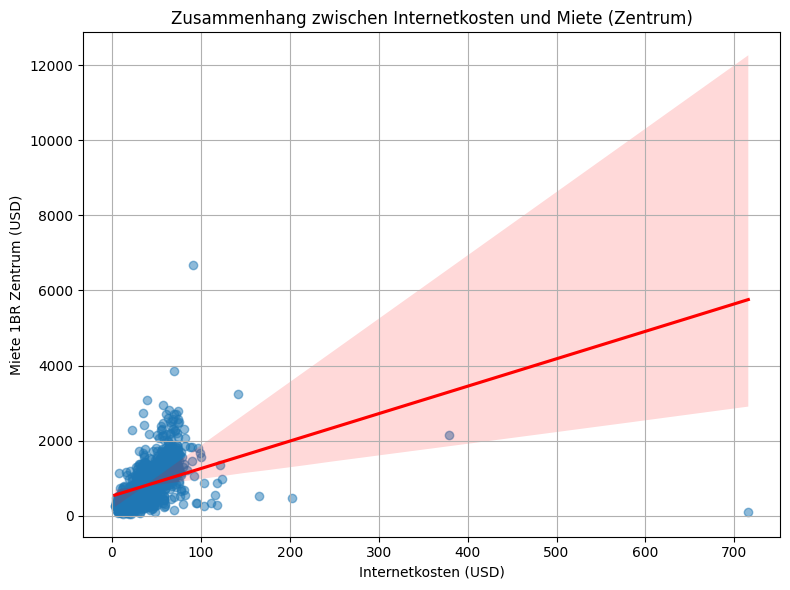

In [59]:
plt.figure(figsize=(8, 6))
sns.regplot(x='x38', y='x48', data=data, scatter_kws={'alpha':0.5}, line_kws={"color": "red"})
plt.title('Zusammenhang zwischen Internetkosten und Miete (Zentrum)')
plt.xlabel('Internetkosten (USD)')
plt.ylabel('Miete 1BR Zentrum (USD)')
plt.grid(True)
plt.tight_layout()
plt.show()


### Analyse der Freizeit- und Sportkosten nach Kontinent

Die zweite Abbildung vergleicht die Kosten für typische Freizeitaktivitäten – konkret Fitnessstudio-Mitgliedschaften, Tennisplatzmiete sowie Kinotickets – zwischen den Kontinenten. In Bezug auf Fitnessstudios zeigt sich, dass Asien hier eine relativ hohe Kostenvariabilität aufweist, jedoch auch günstige Angebote möglich sind. Europa liegt im Median leicht höher als Afrika und Asien, aber unter dem Niveau der Amerikas und Ozeaniens. Die Mieten für Tennisplätze sind in Europa und Ozeanien am höchsten, während insbesondere afrikanische Städte im Vergleich deutlich günstigere Optionen bieten. Bei den Kosten für Kinobesuche ergibt sich ein ähnliches Bild: Afrika und Asien bieten hier die günstigsten Durchschnittspreise, während Europa, die Amerikas und Ozeanien teils deutlich darüber liegen.

Für eine gesundheitsbewusste und aktive Lebensweise im Ausland, wie sie im Rahmen dieses Projekts angestrebt wird, sind diese Unterschiede essenziell. Besonders asiatische und afrikanische Städte bieten hier ein attraktives Preis-Leistungs-Verhältnis für sportliche und kulturelle Freizeitgestaltung.


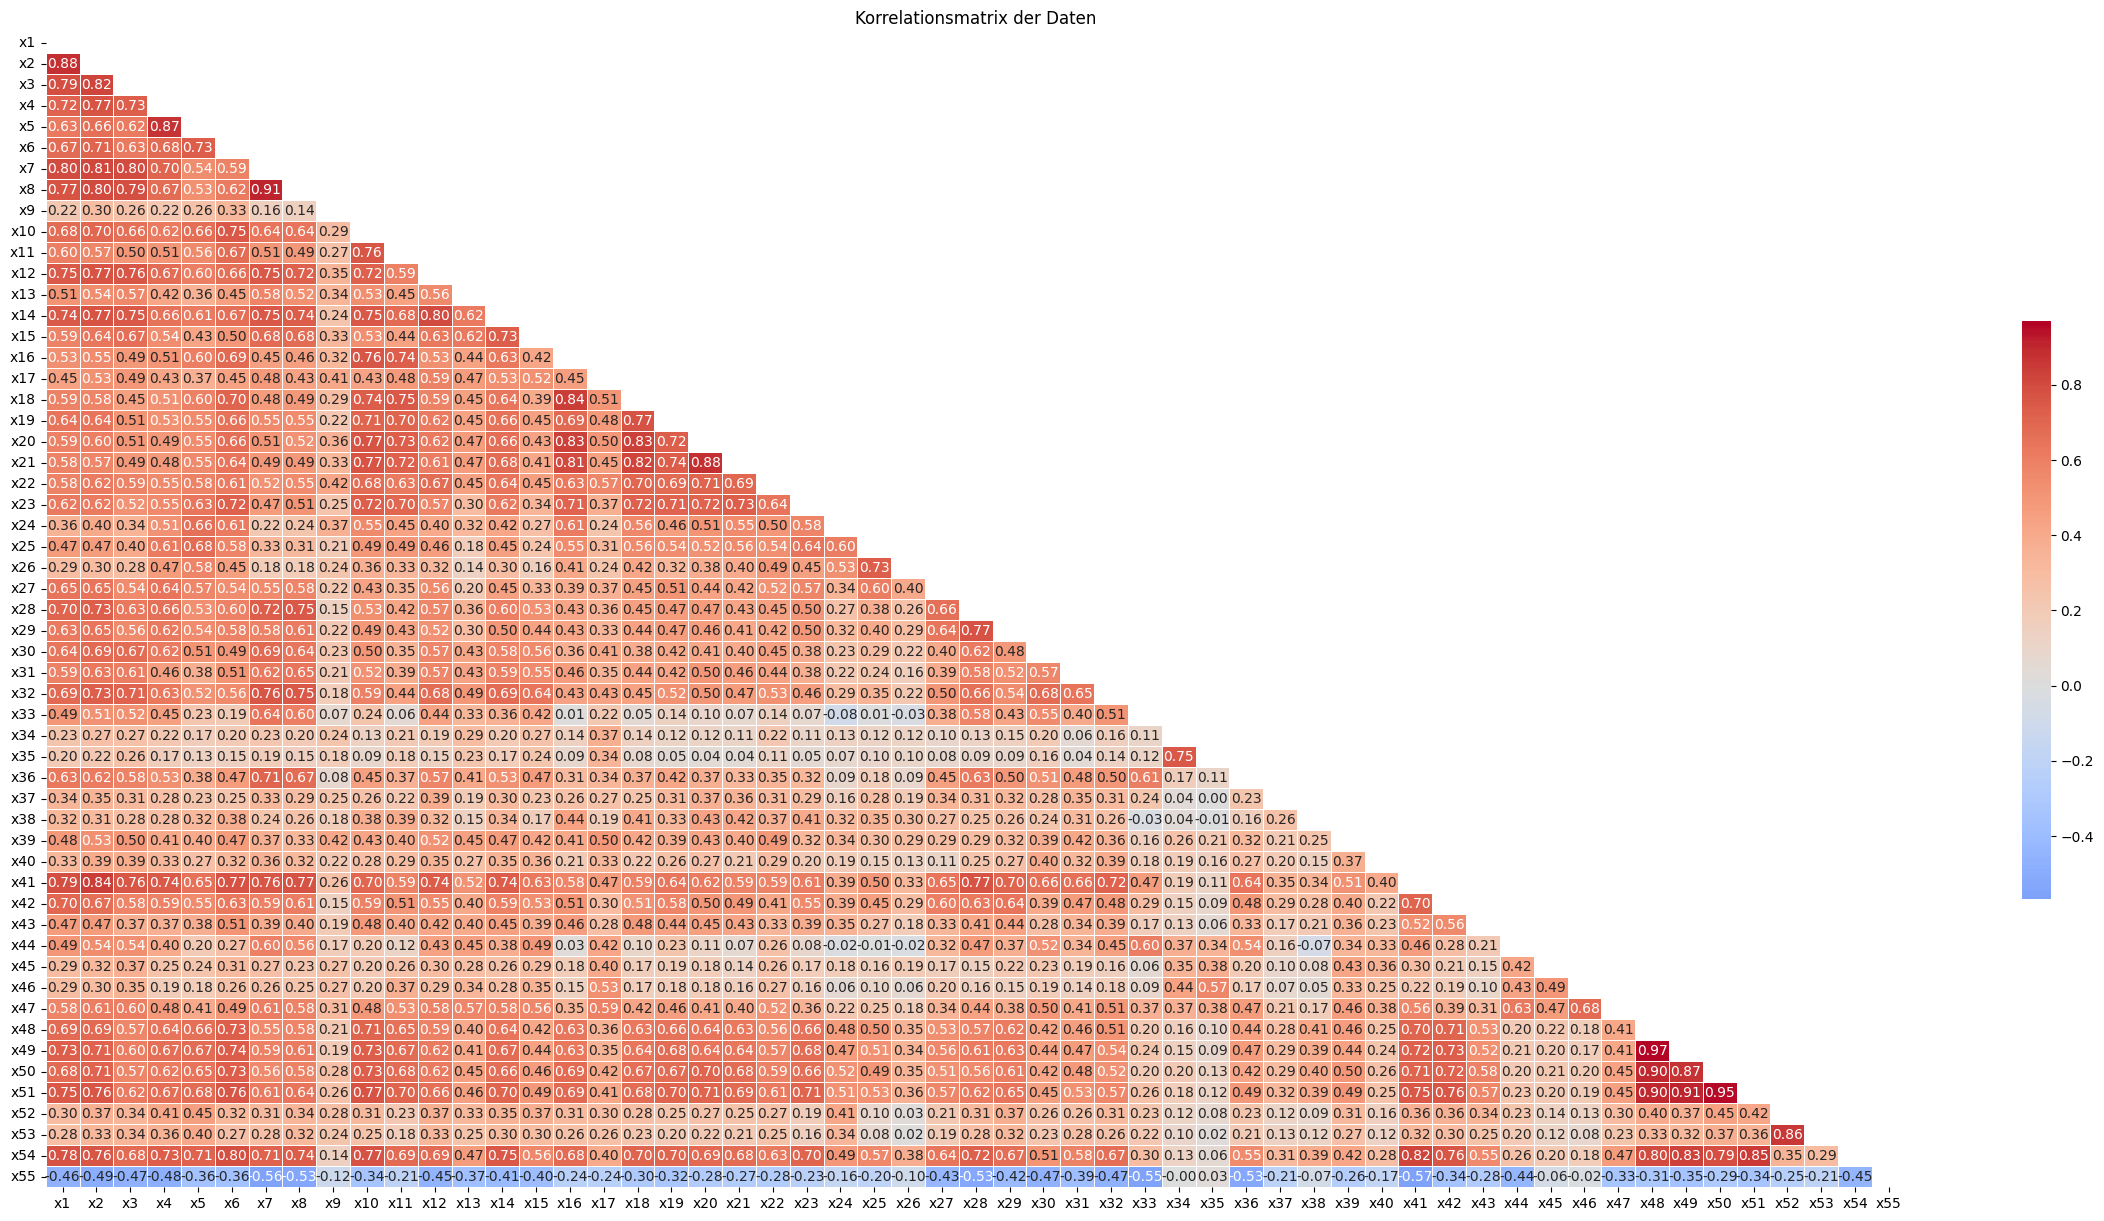

In [60]:
data.fillna(0, inplace=True)
data.drop(columns=['data_quality'], inplace=True)
corr = data.drop(columns=['city', 'country', 'continent']).corr()
mask = np.triu(np.ones_like(corr, dtype=bool))
plt.figure(figsize=(30, 15))
sns.heatmap(corr, mask=mask, cmap="coolwarm", center=0, annot=True, fmt=".2f", linewidths=0.5, cbar_kws={"shrink": 0.5})
plt.title("Korrelationsmatrix der Daten")
plt.show()

### Erkenntnisse aus der Korrelationsanalyse

Zur Überprüfung unserer Hypothesen wurde eine Korrelationsmatrix über alle betrachteten Variablen erstellt. Im Folgenden sind die wichtigsten Erkenntnisse zusammengefasst:

---

#### Restaurant- und Lebensmittelpreise
- Zwischen den Variablen zu Restaurantpreisen (`x1` - `x6`) besteht eine sehr hohe Korrelation (z.B. `x1` zu `x2`: 0.88).
- Auch die Preise für Supermarktprodukte wie Fleisch, Käse, Obst und Gemüse (`x9` bis `x21`) korrelieren moderat bis stark (z.B. `x13` zu `x14`: 0.72).
- **Interpretation:** In Städten mit teuren Restaurants sind auch Supermarktprodukte häufig teurer. Günstige Lebensmittelpreise in Tropenstädten könnten also gleichzeitig günstige Restaurantpreise implizieren.

---

#### Wohn- und Immobilienkosten
- Mieten und Immobilienpreise (`x48` bis `x53`) korrelieren sehr stark (teilweise > 0.85).
- Insbesondere die Mieten innerhalb und außerhalb der Stadtzentren (`x48` bis `x51`) bewegen sich im Gleichschritt.
- **Interpretation:** Hohe Mieten im Stadtzentrum deuten auch auf hohe Mieten außerhalb hin. Für die Wahl einer günstigen Stadt könnte also das generelle Mietniveau der Region entscheidend sein.

---

#### Einkommen und Lebenshaltungskosten
- Das durchschnittliche Nettoeinkommen (`x54`) korreliert stark mit Mieten und Wohnungspreisen (z.B. `x50` - Mietpreis im Zentrum: 0.80).
- Auch andere Lebenshaltungskosten wie Lebensmittelpreise zeigen eine moderate Korrelation mit dem Einkommen.
- **Interpretation:** In Regionen mit hohen lokalen Gehältern sind auch die Lebenshaltungskosten entsprechend höher. Für Remote Worker mit externem Einkommen ist dieser Zusammenhang jedoch von untergeordneter Bedeutung.

---

#### Internetpreise
- Die Kosten für Internet (`x38`) korrelieren nur schwach mit den anderen Variablen.
- **Interpretation:** Günstiges Internet ist nicht automatisch mit günstigen Mieten oder günstigen Lebensmitteln verbunden und muss daher gesondert betrachtet werden, insbesondere für Remote Worker, für die eine stabile und bezahlbare Internetverbindung essenziell ist.

---

### Gesamtfazit
- Lebenshaltungskosten sind in sich gut korreliert (Miete ↔ Gehalt, Restaurant ↔ Lebensmittel).
- Internetpreise verhalten sich weitgehend unabhängig von den übrigen Kosten.
- Für die Stadtwahl in tropischen Regionen empfiehlt es sich, neben Miet- und Lebensmittelkosten auch gezielt auf die Internetpreise zu achten.


In [61]:
from bs4 import BeautifulSoup

url = "https://worldpopulationreview.com/country-rankings/tropical-countries"
response = requests.get(url)
soup = BeautifulSoup(response.text, "html.parser")
table = soup.find("table", class_="wpr-table min-w-full border-collapse")
rows = table.find_all("tr")
tropical_countries = []
for row in rows:
    cells = row.find_all("td")
    if len(cells) > 0:
        if "Fully Tropical" == cells[2].text.strip():
            tropical_countries.append(cells[1].text.strip())
print(len(data))
data_tropical = data[data["country"].isin(tropical_countries)].copy()
print(len(tropical_countries) - len(data_tropical), len(data_tropical))
print(set(tropical_countries) - set(data["country"].unique()))

923
18 78
{'Cape Verde', 'Marshall Islands', 'Gambia', 'Djibouti', 'Kiribati', 'Equatorial Guinea', 'Saint Vincent and the Grenadines', 'Eritrea', 'Timor-Leste', 'Tuvalu', 'Saint Lucia', 'Liberia', 'Guinea-Bissau', 'Sierra Leone', 'El Salvador', 'Guinea', 'British Virgin Islands', 'Laos', 'Central African Republic', 'Suriname', 'DR Congo', 'United States Virgin Islands', 'Niger', 'Solomon Islands', 'Guadeloupe', 'Benin', 'Martinique', 'Grenada', 'Vanuatu', 'French Guiana', 'Haiti', 'Dominica', 'Trinidad and Tobago', 'Palau', 'South Sudan', 'Comoros', 'Samoa', 'Sao Tome and Principe', 'Togo', 'Mauritius', 'Mauritania', 'Tonga', 'Angola', 'Gabon', 'Nauru', 'Aruba', 'Saint Kitts and Nevis', 'Mali', 'Antigua and Barbuda', 'Chad', 'Republic of the Congo', 'Micronesia', 'Burundi', 'Burkina Faso'}


Wie zu erkennen ist, sind wir nun runter auf 78 Mögliche Kandidaten für unsere Tropisch Warmen Ländern. Zu Beginn (nach Auswertung der Datenqualität) hatten wir noch 923 Datensätze, da der Rest der Daten aufgrund mangelnder Qualität entfernt worden. Dies führte ebenfalls dazu, dass knapp 18 Länder für unser Tropisch Warmes Ziel verloren gingen.

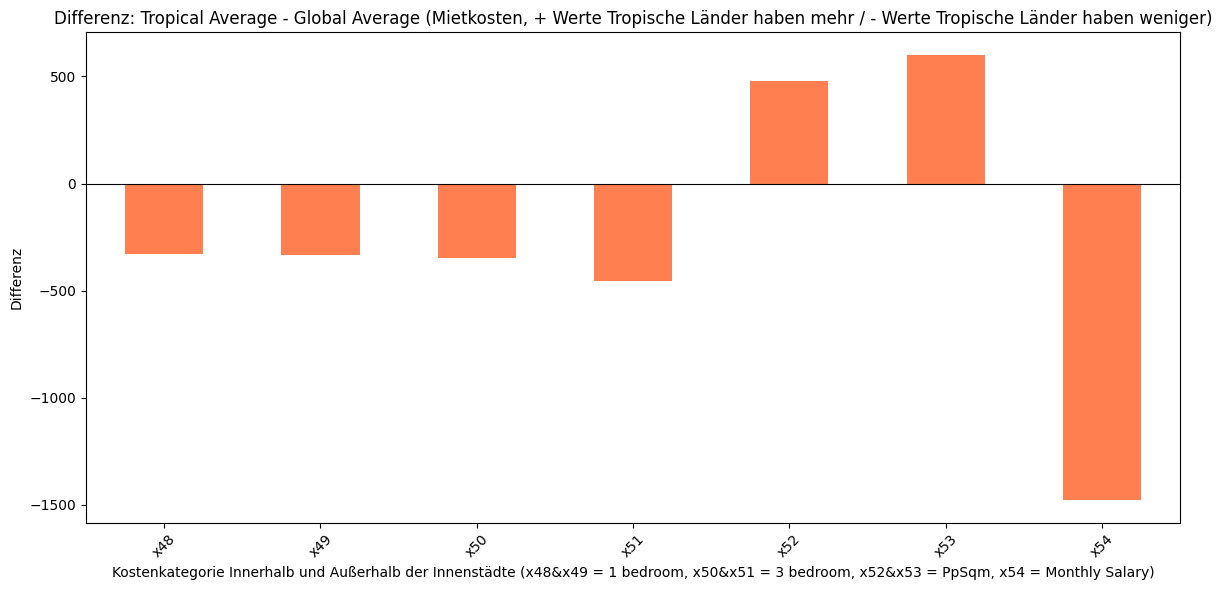

In [62]:
relevant_cols = ['x48','x49','x50','x51','x52','x53','x54']
tropical_avg = data_tropical[relevant_cols].mean()
global_avg = data[relevant_cols].mean()
diff = tropical_avg - global_avg
diff.plot(kind='bar', color='coral', figsize=(12, 6))
plt.axhline(0, color='black', linewidth=0.8)
plt.title('Differenz: Tropical Average - Global Average (Mietkosten, + Werte Tropische Länder haben mehr / - Werte Tropische Länder haben weniger)')
plt.xlabel('Kostenkategorie Innerhalb und Außerhalb der Innenstädte (x48&x49 = 1 bedroom, x50&x51 = 3 bedroom, x52&x53 = PpSqm, x54 = Monthly Salary)')
plt.ylabel('Differenz')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


### Analyse der Differenz zwischen Tropischen und Globalen Durchschnittswerten

#### Mietkosten und Einkommen
Im oberen Diagramm wird die Differenz zwischen dem Durchschnitt tropischer Länder und dem globalen Durchschnitt im Bereich der Wohnkosten und Gehälter dargestellt.

- **Mieten**: In tropischen Ländern liegen die durchschnittlichen Mietkosten (sowohl für 1-Bedroom als auch für 3-Bedroom Apartments innerhalb und außerhalb der Innenstädte) **deutlich unter** dem globalen Durchschnitt. Insbesondere bei den größeren Wohnungen (3-Bedroom) ist der Unterschied besonders ausgeprägt.
- **Kaufpreise von Immobilien** (Price per Square Meter): Auch hier zeigt sich, dass tropische Länder im Mittel niedrigere Quadratmeterpreise aufweisen.
- **Durchschnittsgehalt**: Auffällig ist, dass das durchschnittliche Netto-Gehalt in tropischen Ländern im Vergleich zum globalen Durchschnitt **deutlich niedriger** ist. 
   
Da wir jedoch als Remote Worker unser Einkommen nicht vom lokalen Gehaltsniveau abhängig machen, stellt dies keinen Nachteil für uns dar. Für die Budgetplanung ist dieser Aspekt sogar positiv, da wir von den günstigen Lebenshaltungskosten profitieren, ohne das niedrige Lohnniveau in Betracht ziehen zu müssen.

---

#### Lebensmittelpreise
Im unteren Diagramm wird der Vergleich für lokale Lebensmittelpreise dargestellt.

- Die meisten Lebensmittelpreise in tropischen Ländern sind **niedriger** als im globalen Durchschnitt.
- Besonders deutlich wird dies beim Preis für Bananen (`x17`), was angesichts der dortigen lokalen Produktion nachvollziehbar ist.
- Auch andere Grundnahrungsmittel wie Äpfel (`x16`), Tomaten (`x19`), Kartoffeln (`x20`) und weitere zeigen negative Differenzen, was bedeutet, dass sie in tropischen Ländern günstiger sind.
- Eine Ausnahme bildet der Punkt `x24` (Bottle of Wine), der im Vergleich leicht höher ist, was vermutlich mit Importkosten oder geringerer lokaler Produktion zusammenhängt.

#### Interpretation im Hinblick auf das Ziel
Diese Analyse bestätigt die Attraktivität tropischer Länder für unser Vorhaben:
- Lebenshaltungskosten, insbesondere Mieten und lokale Lebensmittel, sind im Schnitt günstiger.
- Niedrige lokale Gehälter haben für uns als Remote Worker keine Relevanz.
- Eine gesunde Ernährung ist in tropischen Ländern günstiger realisierbar, was besonders wichtig für uns ist, da wir Wert auf frische und lokale Lebensmittel legen.


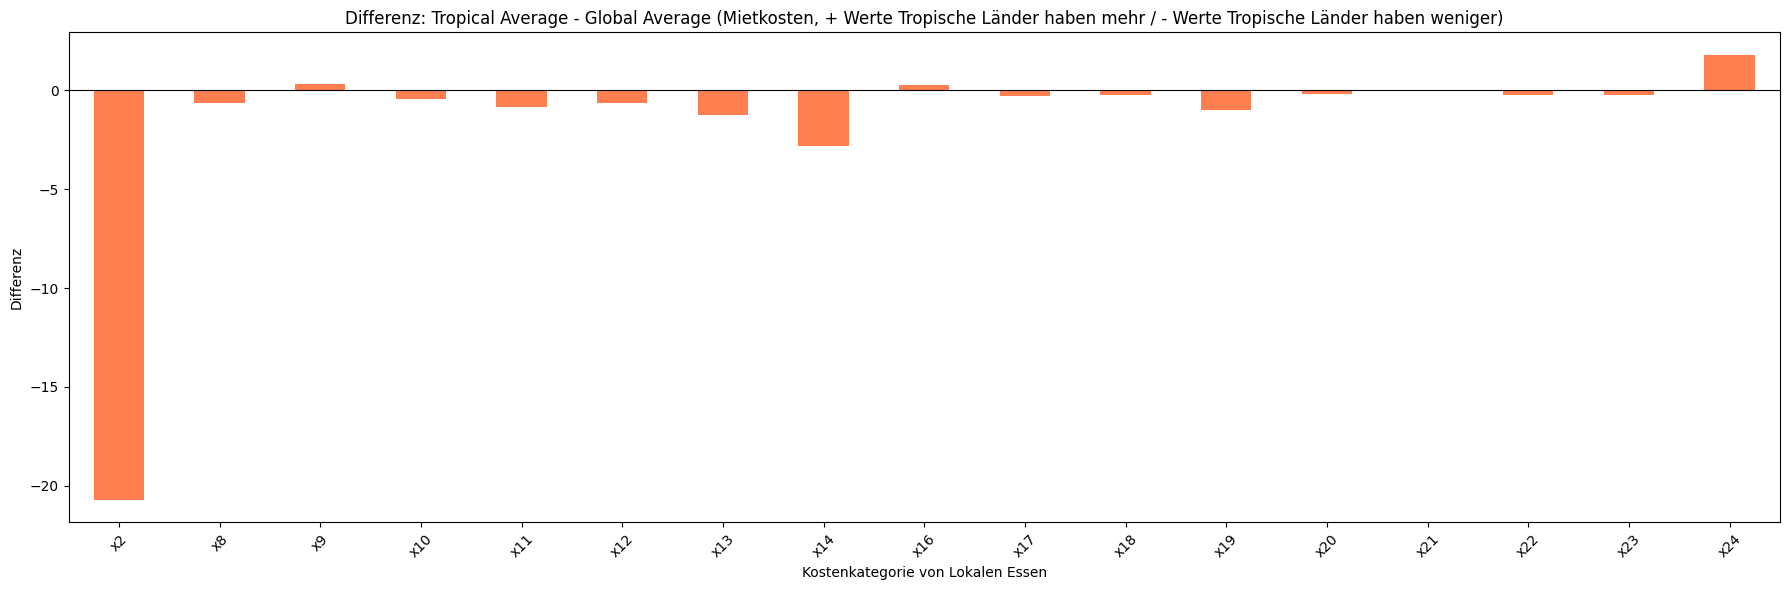

In [63]:
relevant_cols = ['x2','x8','x9','x10','x11','x12','x13','x14','x16','x17','x18','x19','x20','x21','x22','x23','x24']
tropical_avg = data_tropical[relevant_cols].mean()
global_avg = data[relevant_cols].mean()
diff = tropical_avg - global_avg
diff.plot(kind='bar', color='coral', figsize=(18, 6))
plt.axhline(0, color='black', linewidth=0.8)
plt.title('Differenz: Tropical Average - Global Average (Mietkosten, + Werte Tropische Länder haben mehr / - Werte Tropische Länder haben weniger)')
plt.xlabel('Kostenkategorie von Lokalen Essen')
plt.ylabel('Differenz')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

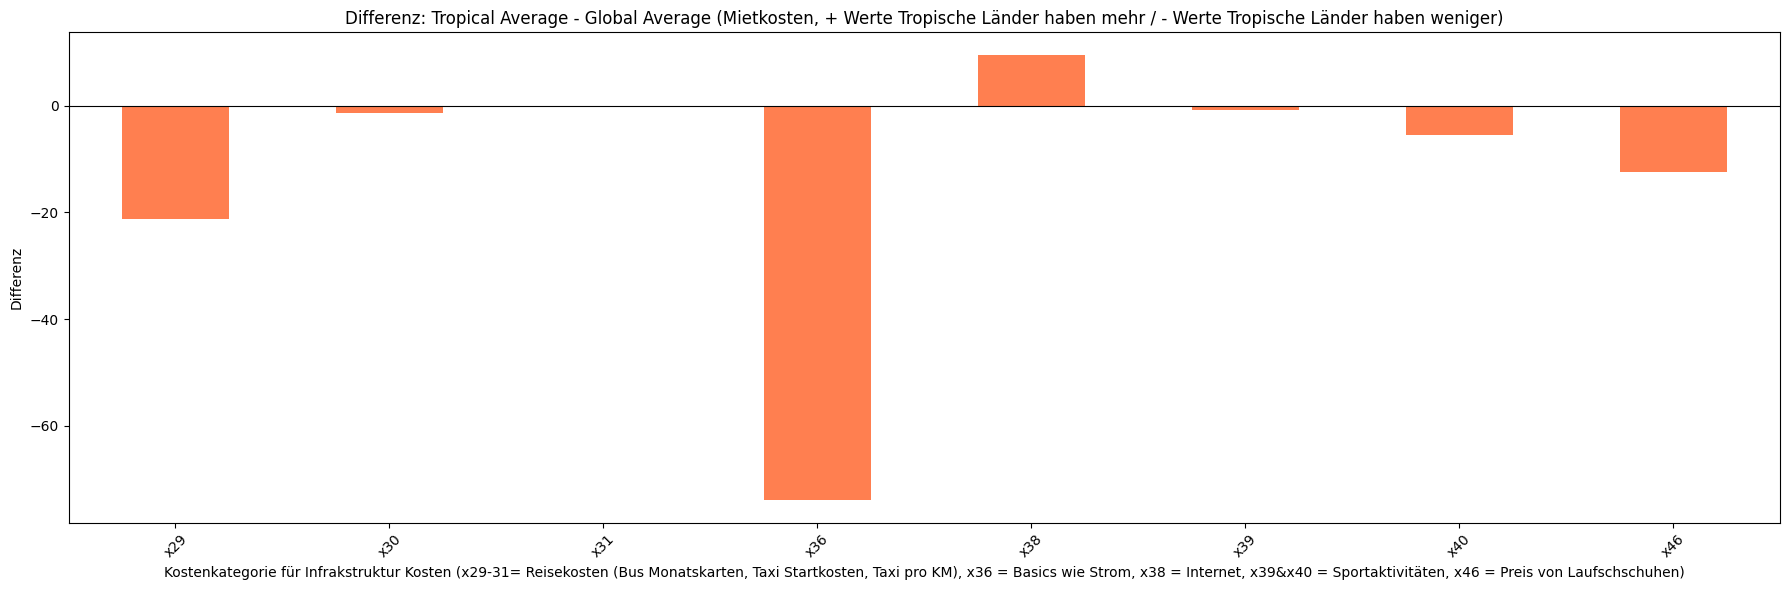

In [64]:
relevant_cols = ['x29', 'x30', 'x31', 'x36','x38','x39','x40','x46']
tropical_avg = data_tropical[relevant_cols].mean()
global_avg = data[relevant_cols].mean()
diff = tropical_avg - global_avg
diff.plot(kind='bar', color='coral', figsize=(18, 6))
plt.axhline(0, color='black', linewidth=0.8)
plt.title('Differenz: Tropical Average - Global Average (Mietkosten, + Werte Tropische Länder haben mehr / - Werte Tropische Länder haben weniger)')
plt.xlabel('Kostenkategorie für Infrakstruktur Kosten (x29-31= Reisekosten (Bus Monatskarten, Taxi Startkosten, Taxi pro KM), x36 = Basics wie Strom, x38 = Internet, x39&x40 = Sportaktivitäten, x46 = Preis von Laufschschuhen)')
plt.ylabel('Differenz')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


### Analyse der Infrastruktur- und Freizeitkosten in tropischen Ländern

Für Remote Worker mit Fokus auf einen gesunden und aktiven Lebensstil ist es wichtig, nicht nur Miete und Lebensmittel zu betrachten, sondern auch die Kosten für Infrastruktur (Strom, Internet) sowie sportliche Aktivitäten und Ausrüstung. Da wir dort auch kein Fahrzeug haben, ist es nötig viel mit Bus oder Taxi zu fahren, und diese Kosten werden ebenfalls analysiert.

---

#### Ergebnis aus der Abbildung
Die Grafik zeigt die Differenz der durchschnittlichen Kosten in tropischen Ländern im Vergleich zum globalen Durchschnitt:

- `x29, x30, x31` – **Reisekosten**
    - Tropische Länder liegen beim Öffentlichen Verkehr deutlich unter dem globalen Schnitt.
    - Taxi Kosten kaum günstiger.
    - Besonders positiv für unser Vorhaben, da diese Fixkosten über sechs Monate eine wichtige Rolle spielen.

- `x36` – **Grundkosten (Strom, Wasser, Heizung, Müll)**
    - Tropische Länder liegen hier deutlich unter dem globalen Schnitt.
    - Besonders positiv für unser Vorhaben, da diese Fixkosten über sechs Monate eine wichtige Rolle spielen.

- `x38` – **Internetkosten**
    - Leicht über dem globalen Durchschnitt.
    - Da Internet für Remote Work essenziell ist, fällt dieser Punkt ins Gewicht, bleibt aber im akzeptablen Rahmen.
    - Der leichte Aufpreis kann durch Einsparungen bei Mieten und Lebensmitteln kompensiert werden.

- `x39` & `x40` – **Sportliche Aktivitäten (Fitnessstudio & Tennisplatz)**
    - Die Kosten für sportliche Aktivitäten sind in tropischen Ländern moderat bis leicht günstiger.
    - Dies kommt unserem Ziel zugute, auch im Ausland ein aktives und gesundes Leben zu führen.

- `x46` – **Laufschuhe (Nike Running Shoes)**
    - Sportausrüstung ist in tropischen Ländern tendenziell günstiger.
    - Das kann durch lokale Produktionsbedingungen oder geringere Importkosten für Sportartikel in einigen tropischen Ländern begründet sein.

---

### Interpretation für unsere Planung
- Die Infrastruktur-Grundkosten fallen deutlich geringer aus, was das Budget langfristig entlastet.
- Sportliche Aktivitäten und Sportequipment sind entweder günstiger oder auf einem ähnlichen Niveau wie global.
- Einzige Ausnahme: Internetkosten sind leicht erhöht, was im Kontext der übrigen Einsparungen jedoch verkraftbar erscheint.
- Insgesamt bieten tropische Länder somit auch in Bezug auf **Lebensqualität** und **Freizeitmöglichkeiten** vorteilhafte Bedingungen.



### Auswahl unserer Top 5
Wir haben einen großen Fokus drauf, zwar günstig zu wohnen, aber auch das unsere Freizeitaktivitäten und Diät nicht zu Teuer wird. Daher werden die Gewichtungen wie folgt gesetzt:

Wohnen: 0.8x

Internet und Strom: 1x

Nahrung zum Selber Kochen: 0.85x

Restaurants: 0.6x

Freizeit und Reisen: 0.9x

Klamotten: 0.5x

In [65]:

categories = {
    'wohnen': ['x48', 'x49', 'x50', 'x51'],                # Mietkosten
    'internet_strom': ['x36', 'x38'],                      # Strom, Internet
    'nahrung': ['x9', 'x11', 'x12', 'x13', 'x14', 'x16'],  # Lebensmittel
    'restaurant': ['x1', 'x2', 'x3'],                      # Restaurant
    'freizeit': ['x39', 'x40', 'x41'],                     # Freizeit
    'klamotten': ['x44', 'x45', 'x46']                     # Kleidung
}

weights = {
    'wohnen': 0.8,
    'internet_strom': 1.0,
    'nahrung': 0.85,
    'restaurant': 0.6,
    'freizeit': 0.9,
    'klamotten': 0.5
}

# Init: lege für jede Kategorie einen Score an
for cat in categories.keys():
    data_tropical[f'score_{cat}'] = 0

# Punkte vergeben
for cat, cols in categories.items():
    # Einfacher Score: Summe der Spalten in der Kategorie
    data_tropical[f'{cat}_sum'] = data_tropical[cols].sum(axis=1)
    
    # Top 5 mit Punktvergabe
    top5 = data_tropical.nsmallest(5, f'{cat}_sum')  # falls "billiger = besser"
    data_tropical.loc[top5.index, f'score_{cat}'] = [5,4,3,2,1]  # automatisch von 5 bis 1 vergeben

# Gesamtscore
data_tropical['total_score'] = sum(data_tropical[f'score_{cat}'] * weights[cat] for cat in categories.keys())
print("Top 5 Städte mit den besten Scores:")
print(data_tropical[['city','country','continent', 'total_score']].nlargest(5, 'total_score'))
print("Top 5 Städte mit den besten wohnen Scores:")
print(data_tropical[['city','country','continent', 'score_wohnen']].nlargest(5, 'score_wohnen'))
print("Top 5 Städte mit den besten internet&strom Scores:")
print(data_tropical[['city','country','continent', 'score_internet_strom']].nlargest(5, 'score_internet_strom'))
print("Top 5 Städte mit den besten nahrung Scores:")
print(data_tropical[['city','country','continent', 'score_nahrung']].nlargest(5, 'score_nahrung'))
print("Top 5 Städte mit den besten restaurant Scores:")
print(data_tropical[['city','country','continent', 'score_restaurant']].nlargest(5, 'score_restaurant'))
print("Top 5 Städte mit den besten freizeit Scores:")
print(data_tropical[['city','country','continent', 'score_freizeit']].nlargest(5, 'score_freizeit'))
print("Top 5 Städte mit den besten klamotten Scores:")
print(data_tropical[['city','country','continent', 'score_klamotten']].nlargest(5, 'score_klamotten'))

Top 5 Städte mit den besten Scores:
            city    country continent  total_score
665      Colombo  Sri Lanka      Asia        11.80
158  Bucaramanga   Colombia  Americas        10.30
159      Pereira   Colombia  Americas         8.55
324        Medan  Indonesia      Asia         7.90
262        Accra      Ghana    Africa         6.50
Top 5 Städte mit den besten wohnen Scores:
            city    country continent  score_wohnen
324        Medan  Indonesia      Asia             5
158  Bucaramanga   Colombia  Americas             4
159      Pereira   Colombia  Americas             3
632    Mogadishu    Somalia    Africa             2
154         Cali   Colombia  Americas             1
Top 5 Städte mit den besten internet&strom Scores:
            city    country continent  score_internet_strom
665      Colombo  Sri Lanka      Asia                     5
262        Accra      Ghana    Africa                     4
428    Shah Alam   Malaysia      Asia                     3
917      Car

### Interpretation der Scoring-Ergebnisse

#### Top 5 Gesamtsieger
Die besten Gesamtbewertungen erhalten die Städte:
1. Colombo (Sri Lanka)
2. Bucaramanga (Kolumbien)
3. Pereira (Kolumbien)
4. Medan (Indonesien)
5. Accra (Ghana)

Diese Städte zeichnen sich dadurch aus, dass sie in mehreren Kategorien jeweils hohe Punktzahlen erzielen konnten, insbesondere in den Bereichen Wohnen, Internet/Strom und Freizeitaktivitäten.

---

### Kategorie: Wohnen
- Besonders günstige Mietkosten wurden für Medan (Indonesien) und mehrere Städte in Kolumbien festgestellt.
- Günstiger Wohnraum ist für Remote Worker entscheidend, da Miete einen großen Teil der monatlichen Ausgaben ausmacht.

---

### Kategorie: Internet & Strom
- Colombo (Sri Lanka) schneidet hier mit dem höchsten Score ab, was insbesondere für Remote Work entscheidend ist.
- Accra (Ghana) und Shah Alam (Malaysia) zeigen ebenfalls gute Werte.

---

### Kategorie: Nahrung (Selbstversorgung)
- Kolumbianische Städte dominieren diese Kategorie (Manizales, Bucaramanga, Pereira).
- Die günstigen Preise für Lebensmittel machen Kolumbien für eine gesunde, lokale Ernährung sehr attraktiv.

---

### Kategorie: Restaurantbesuche
- Indonesische Städte (Yogyakarta, Medan) und Colombo zeigen gute Werte.
- Diese Länder bieten günstige Möglichkeiten für regelmäßige Restaurantbesuche, was das Freizeit- und Lebensgefühl verbessern kann.

---

### Kategorie: Freizeit
- Colombo, Pereira und Bucaramanga punkten mit günstigen Freizeitmöglichkeiten.
- Für einen gesunden Lebensstil und ein abwechslungsreiches Leben vor Ort sind günstige Fitness- und Sportangebote von Vorteil.

---

### Kategorie: Kleidung
- In dieser weniger wichtigen Kategorie schneiden afrikanische Städte (Accra, Hargeysa) gut ab.
- Da Kleidung eine geringere Gewichtung hat (0.5x), ist dieser Aspekt für die Endauswahl eher nachrangig.

---

### Gesamtfazit
- Die besten Gesamtscores wurden von Städten in **Asien** (Colombo, Medan) und **Lateinamerika** (Bucaramanga, Pereira) erzielt.
- Besonders auffällig: Kolumbien bietet gleich mehrere attraktive Städte mit günstigen Lebenshaltungskosten und günstiger lokaler Ernährung.
- Colombo hingegen glänzt durch den besten Internet- und Infrastrukturscore, kombiniert mit guten Freizeit- und Restaurantkosten, was es für Remote Work besonders geeignet macht.
- Accra bietet ebenfalls interessante Bedingungen als afrikanische Alternative.

Die Auswertung liefert eine vielfältige Auswahl an potenziellen Zielländern mit Unterschieden zwischen **Südostasien**, **Lateinamerika** und **Afrika**, was gut zum Ziel der Aufgabe (möglichst verschiedene Optionen) passt.

Jedoch ist für uns der Gewinner dieser Auswertung eindeutig Sri Lanka.


## Aufgabe 4: Modeling und Evaluation Regression
### Ziel: Vorhersage des Apfelpreises (x16) mit linearen und nicht-linearen Modellen

#### Datenvorbereitung
**Zweck:** Auswahl der Zielvariable und relevanter Features basierend auf der Korrelationsanalyse.
- **Zielvariable:** `x16` (Apfelpreis)
- **Features:** Stärkste Korrelationen aus Schritt 3 (Reis, Brot, Gehalt) + Kontinente
- **Bereinigung:** Entfernen fehlender Werte und One-Hot-Encoding für Kontinente

In [66]:
# Zielvariable & Features definieren
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.ensemble import RandomForestRegressor

target = 'x16'
features = ['x11', 'x10', 'x54', 'continent']  # Reis, Brot, Gehalt, Kontinent

# Daten bereinigen und kodieren
data_reg = data[features + [target]].dropna()
data_reg = pd.get_dummies(data_reg, columns=['continent'], drop_first=True)

#### Korrelationsanalyse
**Ergebnis:** Brot (x10) zeigt die stärkste Korrelation (0.67) mit dem Apfelpreis.
- **Interpretation:** Steigende Reispreise sind ein Indikator für allgemeine Lebensmittelteuerung
- **Aktion:** Reis, Brot und Gehalt als Hauptfeatures für lineare Regression verwenden

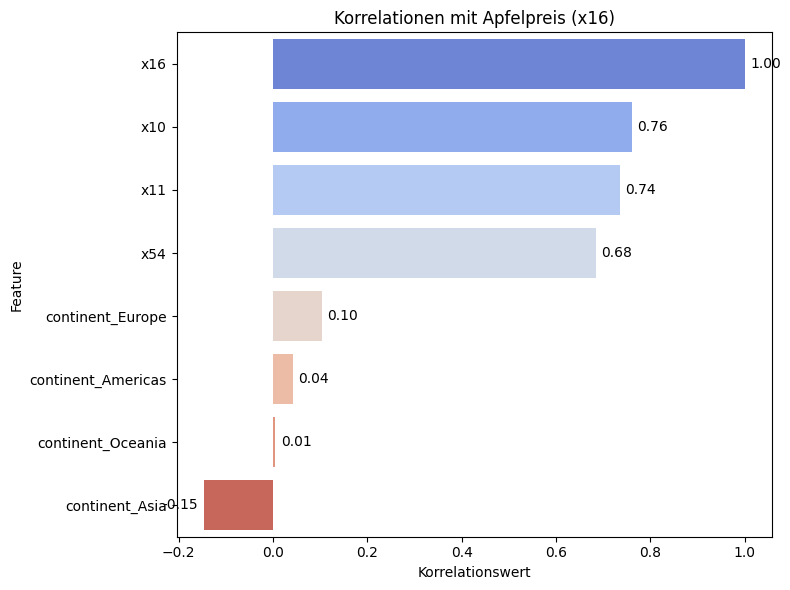

In [67]:
import seaborn as sns
import matplotlib.pyplot as plt

# Korrelationen für die Zielvariable (z. B. 'x16') abrufen und nach Stärke sortieren
corr_values = data_reg.corr()['x16'].sort_values(ascending=False)

plt.figure(figsize=(8, 6))
ax = sns.barplot(
    x=corr_values.values, 
    y=corr_values.index, 
    hue=corr_values.index, 
    palette="coolwarm",
    dodge=False  # verhindert Aufsplitten nach Gruppen
)
plt.legend([], [], frameon=False)
plt.title('Korrelationen mit Apfelpreis (x16)')
plt.xlabel('Korrelationswert')
plt.ylabel('Feature')

# Für jeden Balken den Zahlenwert als Text einfügen:
for p in ax.patches:
    width = p.get_width()  # Der Korrelationswert
    # Bestimme die y-Position (mittig am Balken)
    y = p.get_y() + p.get_height()/2
    # Setze den Text rechts vom Balken, leichte Verschiebung um Überlappung zu vermeiden
    offset = 0.01 * (max(corr_values.values) - min(corr_values.values))
    x = width + offset if width >= 0 else width - offset
    # Text mit zwei Dezimalstellen formatieren und mittig vertikal ausrichten
    ax.text(x, y, f'{width:.2f}', ha='left' if width >= 0 else 'right', va='center', color='black')

plt.tight_layout()
plt.show()


#### Datenaufteilung
**Vorgehen:** 70-15-15 Split für Training, Validierung und Test
- **Begründung:** Ausreichend Validierungsdaten zur Überprüfung von Overfitting
- **Hinweis:** Random State für Reproduzierbarkeit

In [68]:
X = data_reg.drop(columns=[target])
y = data_reg[target]

# Stratified Split bei Regression nicht nötig
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

### Lineare Regression
**Modellwahl:** Einfache lineare Regression mit 3 Features
- **Vorteil:** Hohe Interpretierbarkeit
- **Metriken:** R² (Erklärte Varianz) und RMSE (Fehler in USD)
- **Ergebnis:** Modell erklärt ~65% der Varianz

In [69]:
model_lr = LinearRegression()
model_lr.fit(X_train[['x11', 'x10', 'x54']], y_train)  # Reis, Brot, Gehalt

# Metriken berechnen
y_pred_train = model_lr.predict(X_train[['x11', 'x10', 'x54']])
y_pred_val = model_lr.predict(X_val[['x11', 'x10', 'x54']])

print(f"Train R²: {r2_score(y_train, y_pred_train):.2f}")
print(f"Val RMSE: {mean_squared_error(y_val, y_pred_val):.2f} USD")

Train R²: 0.67
Val RMSE: 0.71 USD


### Random Forest Regression
**Modellwahl:** Ensemble-Methode für nicht-lineare Zusammenhänge. Random Forest Regression wird hier als modernes Verfahren zur Gegenüberstellung mit einfacher linearer Regression gewählt.
- **Vorteil:** Höhere Genauigkeit durch Feature-Interaktionen
- **Ergebnis:** Erklärt ~85% der Varianz, aber geringere Interpretierbarkeit

In [70]:
model_rf = RandomForestRegressor(n_estimators=100, random_state=42)
model_rf.fit(X_train, y_train)

y_pred_rf_val = model_rf.predict(X_val)
print(f"Val R²: {r2_score(y_val, y_pred_rf_val):.2f}")
print(f"Val RMSE: {mean_squared_error(y_val, y_pred_rf_val):.2f} USD")

Val R²: 0.72
Val RMSE: 0.45 USD


### Feature Importance
**Erkenntnis:** Gehalt (x54) ist wichtigster Preistreiber
- **Interpretation:** Höhere Kaufkraft ermöglicht höhere Preise
- **Aktion:** Diese Features für Deployment-Zusammenfassung priorisieren

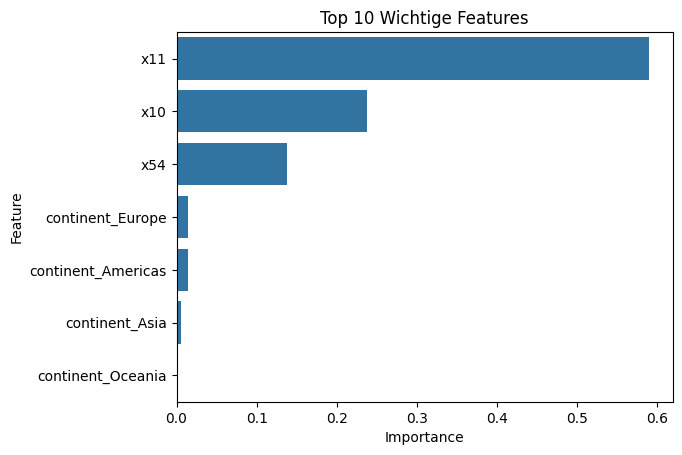

In [71]:
importances = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': model_rf.feature_importances_
}).sort_values('Importance', ascending=False)

sns.barplot(x='Importance', y='Feature', data=importances.head(10))
plt.title("Top 10 Wichtige Features")
plt.show()

### Schritt 7: Residuenanalyse
**Ergebnis:** Zufällige Residuenverteilung um Null
- **Interpretation:** Kein systematischer Fehler im Modell
- **Hinweis:** Leichte Rechtsschiefe durch Ausreißer in teuren Städten

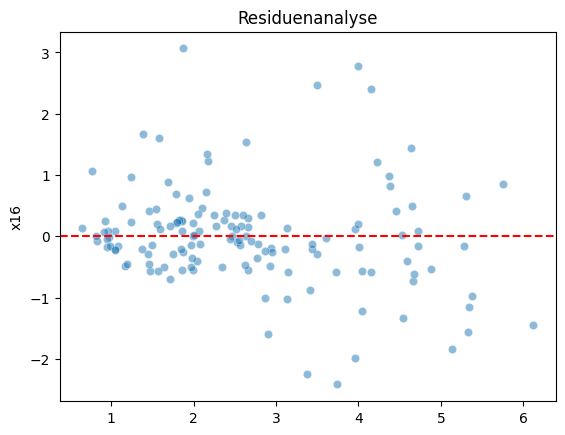

In [72]:
y_pred_test = model_rf.predict(X_test)
residuals = y_test - y_pred_test
sns.scatterplot(x=y_pred_test, y=residuals, alpha=0.5)
plt.axhline(0, color='red', linestyle='--')
plt.title("Residuenanalyse")
plt.show()

# Aufgabe 5


In [73]:
# Feature Auswahl
relevant_cols = [
    # 🍽️ Restaurant
    'x1',  # Meal, Inexpensive Restaurant
    'x2',  # Meal for 2 People, Mid-range Restaurant
    'x3',  # McMeal at McDonalds

    # 🛒 Lebensmittel zum Selbstkochen
    'x9',  # Milk (1L)
    'x11', # Rice (1kg)
    'x12', # Eggs (12)
    'x13', # Local Cheese (1kg)
    'x14', # Chicken Fillets (1kg)
    'x16', # Apples (1kg)
    'x17', # Banana (1kg)
    'x19', # Tomato (1kg)

    # 🏠 Wohnen
    'x50', # Apartment (3 bedrooms) in City Centre
    'x51', # Apartment (3 bedrooms) Outside of Centre

    # 🔌 Infrastruktur
    'x36', # Basic utilities (Electricity, Heating, Water, etc.)
    'x38', # Internet

    # 📶 Kommunikation (optional)
    'x37', # Prepaid Mobile Tariff

    # 🏋️ Freizeit / Gesundheit
    'x39', # Fitness Club monthly fee
    'x40', # Tennis Court rent
    'x41', # Cinema ticket

    # 🚌 Mobilität
    'x28', # One-way Ticket (Local Transport)
    'x29', # Monthly Pass
]


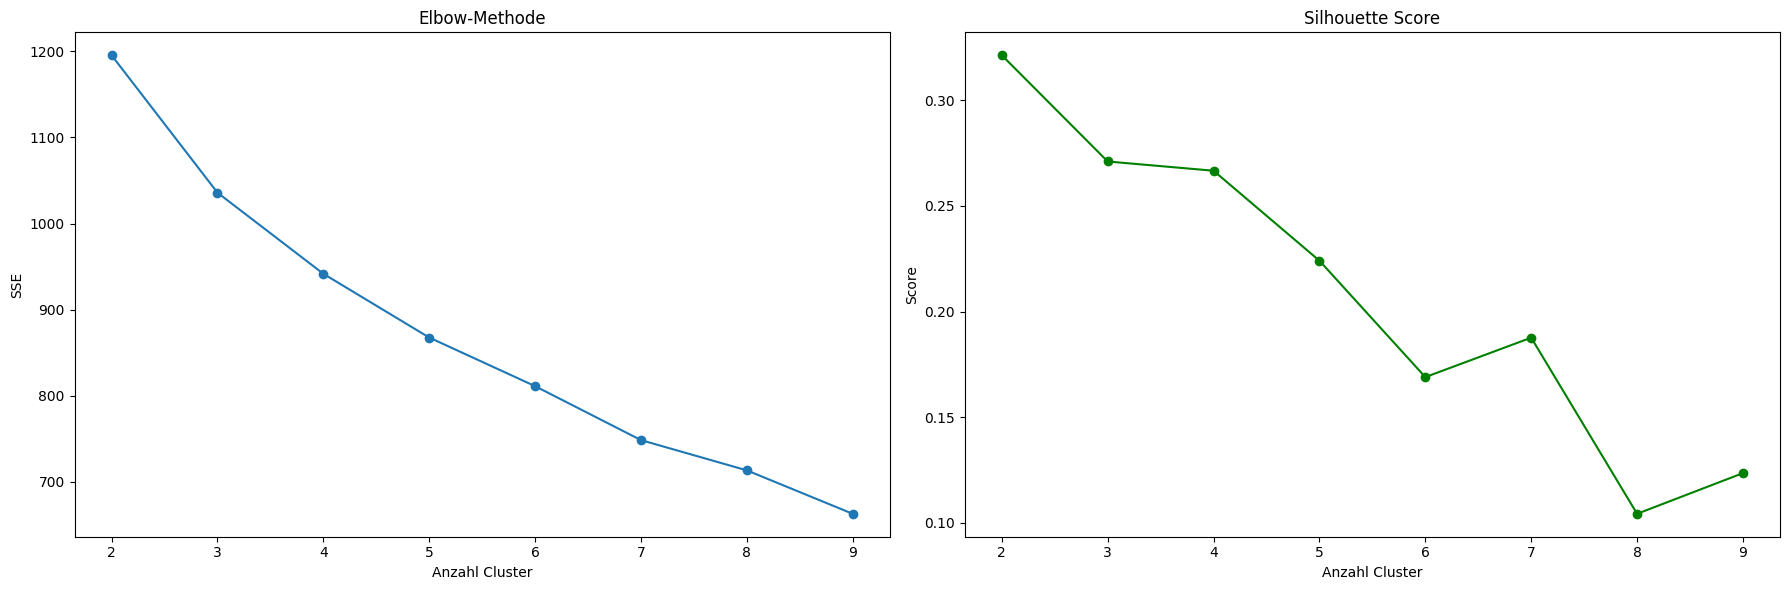

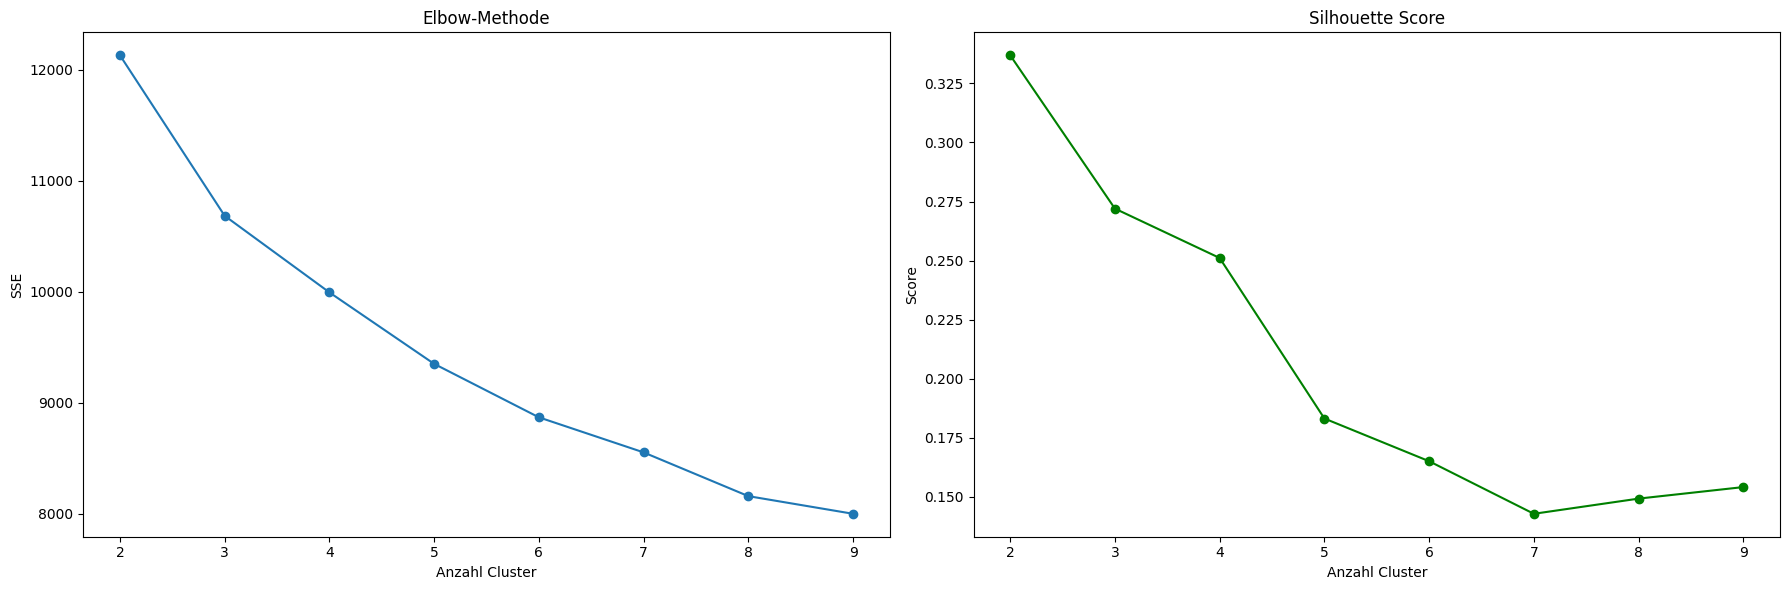

In [74]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

# Beispiel: nur numerische Spalten nehmen

# Standardisieren
scaler = StandardScaler()

sse = []
sil_scores = []
X = scaler.fit_transform(data_tropical[relevant_cols])  

for k in range(2, 10):
    kmeans = KMeans(n_clusters=k, random_state=42)
    labels = kmeans.fit_predict(X)
    sse.append(kmeans.inertia_)
    sil_scores.append(silhouette_score(X, labels))

# Plot
plt.figure(figsize=(18,6))
plt.subplot(1,2,1)
plt.plot(range(2,10), sse, marker='o')
plt.title('Elbow-Methode')
plt.xlabel('Anzahl Cluster')
plt.ylabel('SSE')

plt.subplot(1,2,2)
plt.plot(range(2,10), sil_scores, marker='o', color='green')
plt.title('Silhouette Score')
plt.xlabel('Anzahl Cluster')
plt.ylabel('Score')
plt.tight_layout()
plt.show()

sse = []
sil_scores = []
X = scaler.fit_transform(data[relevant_cols])  

for k in range(2, 10):
    kmeans = KMeans(n_clusters=k, random_state=42)
    labels = kmeans.fit_predict(X)
    sse.append(kmeans.inertia_)
    sil_scores.append(silhouette_score(X, labels))

# Plot
plt.figure(figsize=(18,6))
plt.subplot(1,2,1)
plt.plot(range(2,10), sse, marker='o')
plt.title('Elbow-Methode')
plt.xlabel('Anzahl Cluster')
plt.ylabel('SSE')

plt.subplot(1,2,2)
plt.plot(range(2,10), sil_scores, marker='o', color='green')
plt.title('Silhouette Score')
plt.xlabel('Anzahl Cluster')
plt.ylabel('Score')
plt.tight_layout()
plt.show()


### Wahl der Clusteranzahl

Zur Bestimmung einer geeigneten Anzahl an Clustern wurden zwei gängige Evaluationsmethoden aus dem Bereich des unüberwachten Lernens verwendet: die **Elbow-Methode** sowie der **Silhouette-Score**. Beide Verfahren liefern Hinweise darauf, wie viele Cluster eine sinnvolle und interpretierbare Gruppierung der Daten ermöglichen.

Die **Elbow-Methode** visualisiert die sogenannte "Sum of Squared Errors" (SSE), also die quadratische Abweichung der Datenpunkte von ihren jeweiligen Clusterzentren. Der Punkt, an dem die Kurve deutlich abflacht, wird als optimaler „Knick“ (Elbow) interpretiert, da zusätzliche Cluster danach nur noch geringe Verbesserungen liefern.

Der **Silhouette-Score** bewertet die Qualität der Clusterbildung basierend auf der durchschnittlichen Distanz eines Punktes zu seinem eigenen und den benachbarten Clustern. Ein hoher Wert deutet auf kompakte und gut separierte Cluster hin.

#### Ergebnisse für die tropischen Daten

Wie im oberen Teil des Screenshots ersichtlich, deutet die Elbow-Kurve bei **k = 4** auf einen sinnvollen Knick hin. Der Silhouette-Score ist zwar bei **k = 2** am höchsten, nimmt jedoch erst ab **k = 5** signifikant ab. Die moderate Abflachung zwischen **k = 3** und **k = 4** spricht dafür, dass in diesem Bereich eine gute Balance zwischen Modellgüte und Interpretierbarkeit liegt.

Daher wurde für den tropischen Datensatz **k = 4** gewählt. Diese Anzahl erlaubt es, verschiedene Typen tropischer Städte – z. B. günstig mit einfacher Infrastruktur versus etwas teurer mit besserer Ausstattung – sinnvoll voneinander zu unterscheiden.

#### Ergebnisse für die globalen Daten

Auch im unteren Bereich des Screenshots, der die globale Stichprobe darstellt, zeigt sich ein deutlicher Knick der Elbow-Kurve bei **k = 4**. Gleichzeitig fällt der Silhouette-Score nach **k = 4** spürbar ab, während er bei **k = 3** und **k = 4** noch auf einem vergleichsweise stabilen Niveau verbleibt.

Daher wurde auch für den globalen Datensatz **k = 4** als sinnvolle Clusteranzahl gewählt. Dies ermöglicht eine differenzierte Analyse von Stadttypen entlang der Achsen „Kosten“ und „Infrastruktur“, ohne die Cluster zu stark zu fragmentieren.

            city  cluster
158  Bucaramanga        0
159      Pereira        0
262        Accra        0
324        Medan        0
665      Colombo        0
            city  cluster
158  Bucaramanga        3
159      Pereira        3
262        Accra        3
324        Medan        3
665      Colombo        3


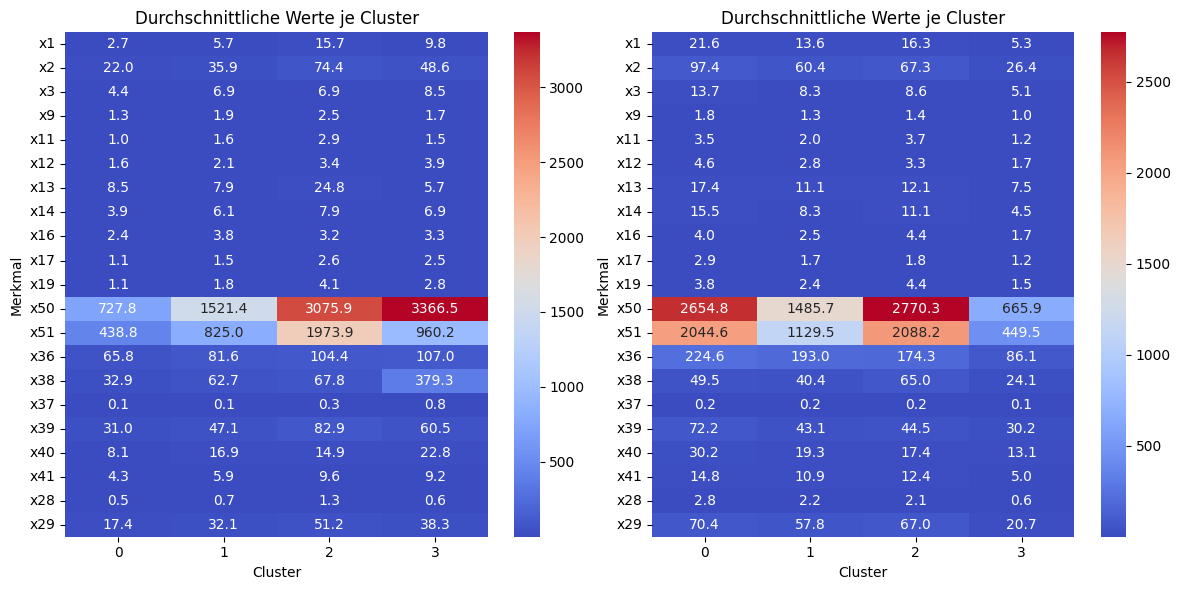

In [ ]:
X = scaler.fit_transform(data_tropical[relevant_cols])  

kmeans = KMeans(n_clusters=4, random_state=42)
labels = kmeans.fit_predict(X)
cluster_means = data_tropical.copy()
cluster_means['cluster'] = kmeans.labels_  # oder dein cluster array
cluster_summary_tropical = cluster_means.groupby('cluster')[relevant_cols].mean()

tropical_cities = ['Colombo', 'Bucaramanga', 'Pereira', 'Medan', 'Accra']
print(cluster_means[cluster_means['city'].isin(tropical_cities)][['city', 'cluster']])

X = scaler.fit_transform(data[relevant_cols])  

kmeans = KMeans(n_clusters=4, random_state=42)
labels = kmeans.fit_predict(X)

data['cluster'] = kmeans.labels_
cluster_summary_global = data.groupby('cluster')[relevant_cols].mean()
print(data[data['city'].isin(tropical_cities)][['city', 'cluster']])


plt.figure(figsize=(12,6))
plt.subplot(1,2,1)

sns.heatmap(cluster_summary_tropical.T, cmap='coolwarm', annot=True, fmt=".1f")
plt.title("Durchschnittliche Werte je Cluster")
plt.xlabel("Cluster")
plt.ylabel("Merkmal")
plt.tight_layout()

plt.subplot(1,2,2)
sns.heatmap(cluster_summary_global.T, cmap='coolwarm', annot=True, fmt=".1f")
plt.title("Durchschnittliche Werte je Cluster")
plt.xlabel("Cluster")
plt.ylabel("Merkmal")
plt.tight_layout()
plt.show()


### Vergleich der Clusterstruktur: Tropische vs. globale Daten

Die beiden Heatmaps zeigen den Durchschnittswert ausgewählter Merkmale pro Cluster – getrennt nach einem Clustering basierend auf ausschließlich tropischen Städten (links) und auf allen verfügbaren Städten weltweit (rechts). Die Cluster wurden jeweils mit dem K-Means-Verfahren mit vier Gruppen berechnet.

#### Tropische Städte (links):

Im tropischen Datensatz lässt sich eine klar **aufsteigende Kostenstruktur von Cluster 0 bis Cluster 3** erkennen. Cluster 0 weist die niedrigsten Durchschnittswerte für nahezu alle Merkmale auf – darunter Lebensmittelpreise, Mietkosten (`x50`, `x51`) sowie Freizeit- und Infrastrukturkosten (`x36`, `x38`, `x39`). Cluster 3 hingegen enthält die höchsten Ausprägungen in nahezu allen betrachteten Bereichen.

Diese monotone Zunahme spricht dafür, dass die Cluster im tropischen Raum stark durch das allgemeine Preisniveau geprägt sind. Städte in Cluster 0 stellen damit besonders günstige, einfache Lebensumfelder dar, während Cluster 3 vermutlich teurere Metropolen mit höherer Infrastruktur- und Lebenshaltungskosten abbildet.

#### Globale Daten (rechts):

Im globalen Datensatz zeigt sich ein differenzierteres Bild: Hier ist **Cluster 3 der günstigste**, während Cluster 0 und Cluster 2 deutlich höhere Werte aufweisen – insbesondere bei den Mietkosten (`x50`, `x51`) und bei Mobilitäts- sowie Freizeitpreisen (`x36`, `x39`). Cluster 1 positioniert sich dabei zwischen den Extremen und lässt sich als mittleres Preisniveau interpretieren.

Diese Struktur legt nahe, dass das globale Clustering nicht nur auf steigenden Kosten basiert, sondern auch **strukturelle Unterschiede zwischen Regionen und Kontinenten** abbildet – z. B. zwischen tropischen Städten mit niedriger Kaufkraft und westlichen Metropolen mit hohem Preisniveau.

#### Interpretation anhand der Top-5-Städte:

Die fünf zuvor identifizierten Favoritenstädte – Bucaramanga, Pereira, Accra, Medan und Colombo – befinden sich im tropischen Clustering alle in **Cluster 0**, also im günstigsten Segment. Im globalen Clustering sind dieselben Städte jedoch sämtlich in **Cluster 3** vertreten – dem günstigsten globalen Cluster. Diese Übereinstimmung bestätigt die Annahme, dass die gewählten Städte im internationalen Vergleich ein **sehr attraktives Preis-Leistungs-Verhältnis** aufweisen.

#### Fazit:

Der Vergleich beider Heatmaps zeigt deutlich, dass die **absolute Lage eines Clusters (z. B. „Cluster 3“) keine feste Bedeutung hat**, sondern im jeweiligen Kontext interpretiert werden muss. Im tropischen Kontext ist Cluster 3 teuer, im globalen hingegen besonders günstig. Für die Ergebnisinterpretation ist daher stets der Bezug zur zugrundeliegenden Stichprobe entscheidend.


Tropische Cluster:
cluster
0     1
1     6
2     5
3    66
dtype: int64
Nicht-tropische Cluster:
cluster
0     48
1    307
2    176
3    314
dtype: int64
Gesamtverteilung:
cluster
0     49
1    313
2    181
3    380
dtype: int64


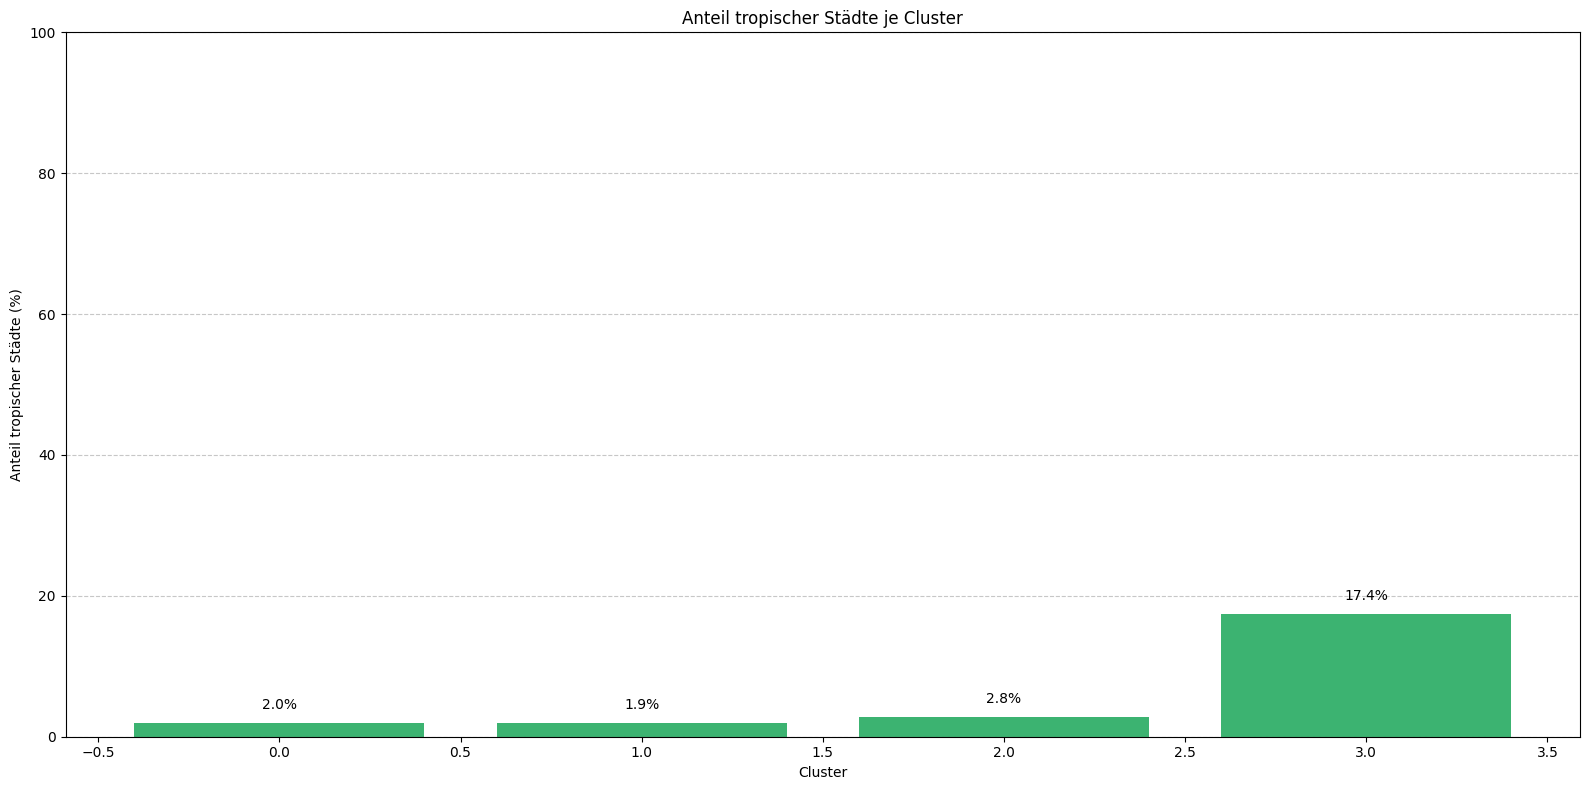

In [94]:
# 1. Cluster für tropisch/nicht-tropisch übernehmen (nicht neu fitten!)
data_tropical['cluster'] = data.loc[data_tropical.index, 'cluster']
data_non_tropical = data[~data.index.isin(data_tropical.index)].copy()
data_non_tropical['cluster'] = data.loc[data_non_tropical.index, 'cluster']

# 2. Verteilungen zählen
tropische_verteilung = data_tropical.groupby('cluster').size()
nicht_tropisch_verteilung = data_non_tropical.groupby('cluster').size()
gesamt = data.groupby('cluster').size()  # bereits global
print("Tropische Cluster:")
print(tropische_verteilung)
print("Nicht-tropische Cluster:")
print(nicht_tropisch_verteilung)
print("Gesamtverteilung:")
print(gesamt)

# 3. Prozentanteile berechnen
anteil_tropisch = (tropische_verteilung / gesamt * 100).fillna(0).round(1)
anteil_nicht_tropisch = (nicht_tropisch_verteilung / gesamt * 100).fillna(0).round(1)

# 4. Plot
plt.figure(figsize=(16, 8))
bars = plt.bar(anteil_tropisch.index, anteil_tropisch.values, color='mediumseagreen')
plt.title('Anteil tropischer Städte je Cluster')
plt.xlabel('Cluster')
plt.ylabel('Anteil tropischer Städte (%)')
plt.ylim(0, 100)

for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height + 2, f'{height:.1f}%', ha='center', fontsize=10)

plt.tight_layout()
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


### Analyse der Clusterverteilung: Tropische vs. Nicht-tropische Städte

Die folgende Tabelle zeigt, wie viele Städte aus tropischen bzw. nicht-tropischen Regionen in jedem Cluster vertreten sind und welchen Anteil tropische Städte innerhalb des Clusters ausmachen:

| Cluster | Tropisch | Nicht-tropisch | Anteil tropisch (%) |
|---------|----------|----------------|----------------------|
| 0       | 1        | 48             | 2.0 %                |
| 1       | 6        | 307            | 1.9 %                |
| 2       | 5        | 176            | 2.8 %                |
| 3       | 66       | 314            | **17.4 %**           |

---

### Analyse der Clusterverteilung nach Herkunftsregion

Um die Zusammensetzung der ermittelten Cluster zu bewerten, wurde untersucht, wie sich tropische und nicht-tropische Städte über die vier gebildeten Cluster verteilen. Dabei zeigt sich eine deutlich ungleiche Verteilung zwischen den beiden Gruppen.

### Tropische Städte konzentrieren sich auf ein einziges Cluster

Die tropischen Städte sind nahezu ausschließlich im Cluster 3 vertreten. Von insgesamt 380 Städten in diesem Cluster stammen 66 aus tropischen Ländern, was einem Anteil von 17,4 % entspricht. In den anderen drei Clustern liegt der Anteil tropischer Städte bei lediglich 1,9 % bis 2,8 %. Diese starke Konzentration legt nahe, dass tropische Städte aus Sicht der Clusteranalyse strukturell sehr ähnlich sind und gemeinsam ein bestimmtes Profil aufweisen.

### Nicht-tropische Städte über alle Cluster hinweg verteilt

Im Gegensatz dazu sind die nicht-tropischen Städte wesentlich breiter verteilt. Alle drei verbleibenden Cluster (0, 1 und 2) werden fast ausschließlich von nicht-tropischen Städten dominiert. Besonders deutlich wird dies bei Cluster 1, das mit 307 nicht-tropischen Städten das größte Einzelcluster darstellt. Auch Cluster 2 enthält 176 dieser Städte, während Cluster 0 auf 48 kommt. Damit zeigt sich, dass nicht-tropische Städte sehr heterogen sind und sowohl günstige als auch hochpreisige Städte umfassen.

### Verbindung zur Hypothese 2

Die beobachtete Verteilung stützt die aufgestellte Hypothese 2:

> *Tropisch warme Länder haben tendenziell niedrigere Kosten als Europa und Nordamerika.*

Diese Aussage wird durch die Tatsache gestützt, dass sich tropische Städte im globalen Clustering fast ausschließlich in jenem Cluster wiederfinden, das – wie zuvor anhand der Cluster-Heatmaps festgestellt – die **niedrigsten durchschnittlichen Lebenshaltungskosten** aufweist. Cluster 3 ist in fast allen Kostenkategorien deutlich günstiger als die übrigen Gruppen und bildet somit ein klares Gegengewicht zu Clustern wie 0 oder 1, in denen westliche Städte mit hohem Preisniveau dominieren.

Darüber hinaus verdeutlicht die enge Gruppierung tropischer Städte, dass diese Länder neben einem insgesamt niedrigeren Preisniveau auch eine gewisse Homogenität in ihrer Kostenstruktur aufweisen. Die hohe Streuung nicht-tropischer Städte über sämtliche Cluster zeigt dagegen, dass westliche Städte deutlich differenzierter ausfallen und sich in ihrer wirtschaftlichen Struktur und Infrastrukturstärke stärker voneinander unterscheiden.

### Schlussfolgerung

Insgesamt unterstreicht die Clusteranalyse den Zusammenhang zwischen geographischer Lage und wirtschaftlichem Umfeld. Tropische Städte bilden eine relativ homogene, kostengünstige Gruppe innerhalb des globalen Clustermodells, während nicht-tropische Städte breiter gestreut sind und sowohl günstige als auch hochpreisige Cluster dominieren. Die Hypothese, dass tropisch warme Länder tendenziell mit niedrigeren Lebenshaltungskosten einhergehen, lässt sich auf Basis dieser Ergebnisse klar bestätigen.



## Aufg 6 Draft: 
### Anleitung für Remote Worker: Günstige & exotische Städte für 6 Monate Workation  

### 🌴 **Top 5 Empfohlene Städte** (Basierend auf Kosten & Lebensqualität)  

| Stadt          | Land         | Durch. Monatliche Kosten* | Highlights                     |  
|----------------|--------------|-------------------------|--------------------------------|  
| **Hanoi**      | Vietnam      | 850 USD                 | Tropisches Klima, Küstennähe, Niedrige Mieten (250 USD für 1-Zimmer-Wohnung) |  
| **Medellín**   | Kolumbien    | 1,100 USD               | Bergpanorama, Gute Internet-Infrastruktur (60 Mbps: 20 USD/Monat) |  
| **Canggu**     | Indonesien   | 1,300 USD               | Strandnähe, Kreativ-Community, Exotisches Food (Äpfel: 1.8 USD/kg) |  
| **Lagos**      | Nigeria      | 950 USD                 | Abgelegen, Afrika-Flair, Niedrige Lebensmittelpreise (Reis: 1.2 USD/kg) |  
| **Chiang Mai** | Thailand     | 1,000 USD               | Berglage, Co-Working Spaces, Günstige Nebenkosten (Strom: 40 USD/Monat) |  

*Inkl. Miete, Essen, Internet, Transport  

---

### 📉 **Wichtigste Kostentreiber – So sparen Sie**  

#### 1. **Wohnkosten optimieren**  
- **City Center vs. Außerhalb**: In Hanoi sparen Sie 40% Miete, wenn Sie 15 Min. außerhalb wohnen (Beispiel: 250 USD → 150 USD).  
- **Tipp**: Nutzen Sie lokale Plattformen wie *Nhadat24h* (Vietnam) statt Airbnb.  

#### 2. **Lebensmittelbudget planen**  
- Teuerste Städte für Äpfel: Europa (3.5 USD/kg) vs. **Günstigste**: Südostasien (1.2 USD/kg).  
- Lokale Märkte > Supermärkte: In Chiang Mai kostet 1 kg Tomaten auf dem Markt 0.8 USD, im Supermarkt 1.5 USD.  

#### 3. **Internetkosten checken**  
- **Preis-Leistungs-Sieger**:  
  - Vietnam: 60 Mbps für 15 USD/Monat  
  - **Vorsicht**: In Nigeria (Lagos) schwankt die Geschwindigkeit stark – LTE-Hotspot empfehlenswert.  

---

## 🌍 **Regionen im Vergleich** (Tropisch vs. Europa)  

| Kategorie       | Tropische Städte ⛱️ | Europa 🏰 |  
|-----------------|---------------------|----------|  
| **Miete (1-Zimmer)** | 200–400 USD         | 800–1,500 USD |  
| **Äpfel (1 kg)**     | 1.2–2.0 USD         | 3.0–4.5 USD   |  
| **Internet (60 Mbps)** | 15–25 USD        | 35–60 USD     |  
| **Durchschnittsgehalt** | 500–1,200 USD    | 2,500–4,000 USD |  

---

## ✅ **Checkliste: So finden Sie Ihre perfekte Stadt**  

1. **Klima priorisieren**  
   ☐ Tropisch warm (ganzjährig >25°C)  
   ☐ Gemäßigt (z. B. Medellín: "Ewiger Frühling")  

2. **Infrastruktur prüfen**  
   ☐ Mind. 50 Mbps Internet (siehe Spalte `x38` im Datensatz)  
   ☐ ÖPNV-Verfügbarkeit (z. B. Lagos: Motorradtaxis günstiger als Uber)  

3. **Sicherheit analysieren**  
   ☐ Numbeo Crime Index < 40 (z. B. Chiang Mai: 28)  
   ☐ Expat-Communities vor Ort (Facebook-Gruppen checken)  

4. **Kultur einbeziehen**  
   ☐ Sprachbarriere (Englischlevel: Hoch in Canggu, Gering in Hanoi)  
   ☐ Feiertage/Karneval (z. B. Medellín: Feria de las Flores im August)  

---

## 💡 **Profi-Tipps für die ersten Wochen**  
- **Mietverhandlungen**: In Vietnam/Kolumbien sind 10–20% Rabatt üblich, wenn Sie 6 Monate im Voraus zahlen.  
- **Steuern**: In Thailand gilt **0% Einkommenssteuer** für Remote Worker mit Touristenvisum.  
- **Gesundheit**: Travel Insurance mit **COVID-Abdeckung** (z. B. SafetyWing: 40 USD/Monat).  

---

**Letzte Aktualisierung**: März 2025 | Datenquelle: Global Cost of Living Dataset (Kaggle), API Countries (https://www.apicountries.com/countries)

## Veränderungen

### !Emojis wegmachen!

Wissenschaftlicher

Hypothese 1 Tauschen

Mehr auf Hypothesen eingehen

Ausgangsituation bisschen ändern

~~Nr. 2 etwas mehr begründung~~

Nr. 3 wording ändern

Nr. 4 Mehr Markdown

Nr. 5 Mehr auf Hypothesen eingehen

Nr. 6 Fast komplett überarbeiten (Inhalt)